In [1]:
import os
import sys
import json
from pathlib import Path
from copy import deepcopy
import time
import inspect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from pathlib import Path

from tqdm.notebook import tqdm

In [2]:
import solvers as task_solvers
import verifiers as task_verifiers
import verifiers_reformatted as task_verifiers_reformatted
from solver_class import Solver
from arc_types import *
from dsl import *
from constants import *

sys.path.insert(0, '../visualization')
from visualization_utils import *

In [3]:
data_path = Path('../data')
train_path = data_path / 'arc-agi_training_challenges.json'
train_sols_path = data_path / 'arc-agi_training_solutions.json'
eval_path = data_path / 'arc-agi_evaluation_challenges.json'
eval_sols_path = data_path / 'arc-agi_evaluation_solutions.json'
re_arc_path = data_path / 're-arc_tasks'

In [4]:
with open(train_path, 'r') as f:
    train_tasks = json.load(f)
with open(train_sols_path, 'r') as f:
    train_sols = json.load(f)
train_task_labels = sorted(train_tasks.keys())

# Testing vanilla solvers vs re-arc tasks

In [5]:
number_re_arc_solved = {label: 0 for label in train_task_labels}
re_arc_solving_times = {label: None for label in train_task_labels}

for i, label in enumerate(train_task_labels):
    with open(re_arc_path / f"{label}.json", "r") as f:
        re_arc_examples = json.load(f)
    print(f"Testing solver number {i}, for {label}.")
    solver = getattr(task_solvers, f"solve_{label}")
    ast = lambda g: tuple(tuple(r) for r in g) # Converts grid to tuple format for DSL
    starttime = time.time()
    for in_out_pair in tqdm(re_arc_examples):
        I = ast(in_out_pair['input'])
        O_exp = ast(in_out_pair['output'])
        O = None
        try:
            O = solver(I)
        except:
            pass
        if O == O_exp:
            number_re_arc_solved[label] += 1
    re_arc_solving_times[label] = time.time()-starttime

Testing solver number 0, for 007bbfb7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 1, for 00d62c1b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 2, for 017c7c7b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 3, for 025d127b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 4, for 045e512c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 5, for 0520fde7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 6, for 05269061.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 7, for 05f2a901.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 8, for 06df4c85.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 9, for 08ed6ac7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 10, for 09629e4f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 11, for 0962bcdd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 12, for 0a938d79.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 13, for 0b148d64.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 14, for 0ca9ddb6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 15, for 0d3d703e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 16, for 0dfd9992.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 17, for 0e206a2e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 18, for 10fcaaa3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 19, for 11852cab.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 20, for 1190e5a7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 21, for 137eaa0f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 22, for 150deff5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 23, for 178fcbfb.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 24, for 1a07d186.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 25, for 1b2d62fb.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 26, for 1b60fb0c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 27, for 1bfc4729.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 28, for 1c786137.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 29, for 1caeab9d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 30, for 1cf80156.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 31, for 1e0a9b12.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 32, for 1e32b0e9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 33, for 1f0c79e5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 34, for 1f642eb9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 35, for 1f85a75f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 36, for 1f876c06.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 37, for 1fad071e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 38, for 2013d3e2.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 39, for 2204b7a8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 40, for 22168020.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 41, for 22233c11.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 42, for 2281f1f4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 43, for 228f6490.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 44, for 22eb0ac0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 45, for 234bbc79.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 46, for 23581191.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 47, for 239be575.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 48, for 23b5c85d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 49, for 253bf280.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 50, for 25d487eb.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 51, for 25d8a9c8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 52, for 25ff71a9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 53, for 264363fd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 54, for 272f95fa.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 55, for 27a28665.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 56, for 28bf18c6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 57, for 28e73c20.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 58, for 29623171.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 59, for 29c11459.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 60, for 29ec7d0e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 61, for 2bcee788.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 62, for 2bee17df.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 63, for 2c608aff.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 64, for 2dc579da.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 65, for 2dd70a9a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 66, for 2dee498d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 67, for 31aa019c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 68, for 321b1fc6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 69, for 32597951.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 70, for 3345333e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 71, for 3428a4f5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 72, for 3618c87e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 73, for 3631a71a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 74, for 363442ee.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 75, for 36d67576.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 76, for 36fdfd69.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 77, for 3906de3d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 78, for 39a8645d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 79, for 39e1d7f9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 80, for 3aa6fb7a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 81, for 3ac3eb23.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 82, for 3af2c5a8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 83, for 3bd67248.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 84, for 3bdb4ada.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 85, for 3befdf3e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 86, for 3c9b0459.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 87, for 3de23699.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 88, for 3e980e27.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 89, for 3eda0437.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 90, for 3f7978a0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 91, for 40853293.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 92, for 4093f84a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 93, for 41e4d17e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 94, for 4258a5f9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 95, for 4290ef0e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 96, for 42a50994.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 97, for 4347f46a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 98, for 444801d8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 99, for 445eab21.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 100, for 447fd412.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 101, for 44d8ac46.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 102, for 44f52bb0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 103, for 4522001f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 104, for 4612dd53.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 105, for 46442a0e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 106, for 469497ad.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 107, for 46f33fce.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 108, for 47c1f68c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 109, for 484b58aa.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 110, for 48d8fb45.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 111, for 4938f0c2.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 112, for 496994bd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 113, for 49d1d64f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 114, for 4be741c5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 115, for 4c4377d9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 116, for 4c5c2cf0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 117, for 50846271.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 118, for 508bd3b6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 119, for 50cb2852.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 120, for 5117e062.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 121, for 5168d44c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 122, for 539a4f51.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 123, for 53b68214.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 124, for 543a7ed5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 125, for 54d82841.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 126, for 54d9e175.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 127, for 5521c0d9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 128, for 5582e5ca.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 129, for 5614dbcf.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 130, for 56dc2b01.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 131, for 56ff96f3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 132, for 57aa92db.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 133, for 5ad4f10b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 134, for 5bd6f4ac.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 135, for 5c0a986e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 136, for 5c2c9af4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 137, for 5daaa586.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 138, for 60b61512.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 139, for 6150a2bd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 140, for 623ea044.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 141, for 62c24649.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 142, for 63613498.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 143, for 6430c8c4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 144, for 6455b5f5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 145, for 662c240a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 146, for 67385a82.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 147, for 673ef223.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 148, for 6773b310.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 149, for 67a3c6ac.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 150, for 67a423a3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 151, for 67e8384a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 152, for 681b3aeb.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 153, for 6855a6e4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 154, for 68b16354.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 155, for 694f12f3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 156, for 6a1e5592.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 157, for 6aa20dc0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 158, for 6b9890af.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 159, for 6c434453.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 160, for 6cdd2623.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 161, for 6cf79266.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 162, for 6d0160f0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 163, for 6d0aefbc.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 164, for 6d58a25d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 165, for 6d75e8bb.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 166, for 6e02f1e3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 167, for 6e19193c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 168, for 6e82a1ae.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 169, for 6ecd11f4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 170, for 6f8cd79b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 171, for 6fa7a44f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 172, for 72322fa7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 173, for 72ca375d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 174, for 73251a56.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 175, for 7447852a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 176, for 7468f01a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 177, for 746b3537.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 178, for 74dd1130.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 179, for 75b8110e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 180, for 760b3cac.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 181, for 776ffc46.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 182, for 77fdfe62.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 183, for 780d0b14.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 184, for 7837ac64.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 185, for 794b24be.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 186, for 7b6016b9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 187, for 7b7f7511.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 188, for 7c008303.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 189, for 7ddcd7ec.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 190, for 7df24a62.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 191, for 7e0986d6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 192, for 7f4411dc.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 193, for 7fe24cdd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 194, for 80af3007.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 195, for 810b9b61.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 196, for 82819916.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 197, for 83302e8f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 198, for 834ec97d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 199, for 8403a5d5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 200, for 846bdb03.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 201, for 855e0971.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 202, for 85c4e7cd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 203, for 868de0fa.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 204, for 8731374e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 205, for 88a10436.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 206, for 88a62173.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 207, for 890034e9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 208, for 8a004b2b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 209, for 8be77c9e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 210, for 8d5021e8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 211, for 8d510a79.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 212, for 8e1813be.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 213, for 8e5a5113.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 214, for 8eb1be9a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 215, for 8efcae92.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 216, for 8f2ea7aa.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 217, for 90c28cc7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 218, for 90f3ed37.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 219, for 913fb3ed.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 220, for 91413438.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 221, for 91714a58.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 222, for 9172f3a0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 223, for 928ad970.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 224, for 93b581b8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 225, for 941d9a10.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 226, for 94f9d214.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 227, for 952a094c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 228, for 9565186b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 229, for 95990924.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 230, for 963e52fc.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 231, for 97999447.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 232, for 97a05b5b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 233, for 98cf29f8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 234, for 995c5fa3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 235, for 99b1bc43.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 236, for 99fa7670.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 237, for 9aec4887.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 238, for 9af7a82c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 239, for 9d9215db.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 240, for 9dfd6313.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 241, for 9ecd008a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 242, for 9edfc990.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 243, for 9f236235.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 244, for a1570a43.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 245, for a2fd1cf0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 246, for a3325580.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 247, for a3df8b1e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 248, for a416b8f3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 249, for a48eeaf7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 250, for a5313dff.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 251, for a5f85a15.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 252, for a61ba2ce.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 253, for a61f2674.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 254, for a64e4611.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 255, for a65b410d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 256, for a68b268e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 257, for a699fb00.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 258, for a740d043.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 259, for a78176bb.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 260, for a79310a0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 261, for a85d4709.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 262, for a87f7484.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 263, for a8c38be5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 264, for a8d7556c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 265, for a9f96cdd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 266, for aabf363d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 267, for aba27056.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 268, for ac0a08a4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 269, for ae3edfdc.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 270, for ae4f1146.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 271, for aedd82e4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 272, for af902bf9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 273, for b0c4d837.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 274, for b190f7f5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 275, for b1948b0a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 276, for b230c067.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 277, for b27ca6d3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 278, for b2862040.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 279, for b527c5c6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 280, for b548a754.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 281, for b60334d2.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 282, for b6afb2da.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 283, for b7249182.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 284, for b775ac94.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 285, for b782dc8a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 286, for b8825c91.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 287, for b8cdaf2b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 288, for b91ae062.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 289, for b94a9452.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 290, for b9b7f026.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 291, for ba26e723.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 292, for ba97ae07.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 293, for bb43febb.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 294, for bbc9ae5d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 295, for bc1d5164.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 296, for bd4472b8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 297, for bda2d7a6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 298, for bdad9b1f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 299, for be94b721.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 300, for beb8660c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 301, for c0f76784.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 302, for c1d99e64.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 303, for c3e719e8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 304, for c3f564a4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 305, for c444b776.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 306, for c59eb873.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 307, for c8cbb738.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 308, for c8f0f002.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 309, for c909285e.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 310, for c9e6f938.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 311, for c9f8e694.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 312, for caa06a1f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 313, for cbded52d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 314, for cce03e0d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 315, for cdecee7f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 316, for ce22a75a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 317, for ce4f8723.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 318, for ce602527.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 319, for ce9e57f2.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 320, for cf98881b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 321, for d037b0a7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 322, for d06dbe63.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 323, for d07ae81c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 324, for d0f5fe59.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 325, for d10ecb37.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 326, for d13f3404.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 327, for d22278a0.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 328, for d23f8c26.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 329, for d2abd087.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 330, for d364b489.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 331, for d406998b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 332, for d43fd935.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 333, for d4469b4b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 334, for d4a91cb9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 335, for d4f3cd78.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 336, for d511f180.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 337, for d5d6de2d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 338, for d631b094.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 339, for d687bc17.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 340, for d6ad076f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 341, for d89b689b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 342, for d8c310e9.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 343, for d90796e8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 344, for d9f24cd1.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 345, for d9fac9be.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 346, for dae9d2b5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 347, for db3e9e38.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 348, for db93a21d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 349, for dbc1a6ce.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 350, for dc0a314f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 351, for dc1df850.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 352, for dc433765.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 353, for ddf7fa4f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 354, for de1cd16c.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 355, for ded97339.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 356, for e179c5f4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 357, for e21d9049.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 358, for e26a3af2.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 359, for e3497940.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 360, for e40b9e2f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 361, for e48d4e1a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 362, for e5062a87.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 363, for e509e548.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 364, for e50d258f.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 365, for e6721834.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 366, for e73095fd.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 367, for e76a88a6.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 368, for e8593010.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 369, for e8dc4411.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 370, for e9614598.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 371, for e98196ab.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 372, for e9afcf9a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 373, for ea32f347.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 374, for ea786f4a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 375, for eb281b96.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 376, for eb5a1d5d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 377, for ec883f72.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 378, for ecdecbb3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 379, for ed36ccf7.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 380, for ef135b50.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 381, for f15e1fac.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 382, for f1cefba8.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 383, for f25fbde4.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 384, for f25ffba3.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 385, for f2829549.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 386, for f35d900a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 387, for f5b8619d.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 388, for f76d97a5.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 389, for f8a8fe49.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 390, for f8b3ba0a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 391, for f8c80d96.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 392, for f8ff0b80.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 393, for f9012d9b.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 394, for fafffa47.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 395, for fcb5c309.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 396, for fcc82909.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 397, for feca6190.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 398, for ff28f65a.


  0%|          | 0/1000 [00:00<?, ?it/s]

Testing solver number 399, for ff805c23.


  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
results = pd.concat([pd.DataFrame.from_dict(number_re_arc_solved, orient = 'index'),
                     pd.DataFrame.from_dict(re_arc_solving_times, orient = 'index')],
                     axis = 1)
results.columns = ['num solved', 'runtime']

In [19]:
results.sort_values(by = 'num solved').head(50)

num solved    runtime
ff805c23           0   0.041365
31aa019c           0   0.044985
3428a4f5           0   0.017341
d4f3cd78           0   0.046983
d5d6de2d           0   0.264990
7c008303           0   0.189323
53b68214           0   0.075876
54d9e175           0   0.275471
5582e5ca           0   0.017141
4522001f           0   0.045644
af902bf9           0  14.282784
e179c5f4           0   0.019878
a78176bb           0   0.156319
a8c38be5           0   0.527031
88a10436           0   0.083133
8a004b2b           0   0.211346
4938f0c2           0   0.182025
496994bd           0   0.007891
a1570a43           0   0.037803
94f9d214           0   0.015520
ce4f8723           0   0.015189
d13f3404           0   0.142960
363442ee           0   0.174196
77fdfe62           0   0.236199
f25ffba3           0   0.005411
6430c8c4           0   0.022957
f8a8fe49           0   0.118411
234bbc79           0   0.184800
28e73c20           0   0.080140
ef135b50           0   5.672703
e9afcf9a           1   0.006810
a3df8b1e           1   0.027344
bdad9b1f           1   0.042398
8f2ea7aa           1   0.063022
6a1e5592           1   0.859499
2dc579da           1   0.016692
bc1d5164           1   0.022669
b527c5c6           1   0.173986
ae3edfdc           2   0.355818
ddf7fa4f           2   0.145283
e48d4e1a           2   0.118089
6e19193c           2   0.126022
9af7a82c           2   0.265692
5168d44c           2   0.060609
63613498           2   0.189246
23581191           2   1.521799
6b9890af           2   0.220194
b2862040           2   0.476639
7e0986d6           3   0.148592
6855a6e4           3   0.060038

In [20]:
results.sort_values(by = 'num solved').tail(50)

num solved    runtime
ae4f1146        1000   0.104048
445eab21        1000   0.155420
44d8ac46        1000   0.210001
3af2c5a8        1000   0.006265
3c9b0459        1000   0.006003
3aa6fb7a        1000   0.195184
d10ecb37        1000   0.004566
d2abd087        1000   0.171743
c59eb873        1000   0.023551
ba97ae07        1000   0.150106
b7249182        1000   0.138722
b91ae062        1000   0.020057
72ca375d        1000   0.289143
7468f01a        1000   0.133309
746b3537        1000   0.342493
6d0aefbc        1000   0.010305
868de0fa        1000   0.588237
88a62173        1000   0.089742
8be77c9e        1000   0.004708
c8f0f002        1000   0.017264
c9e6f938        1000   0.009575
913fb3ed        1000   0.046817
9172f3a0        1000   0.014956
8d5021e8        1000   0.014466
c1d99e64        1000   0.037386
e26a3af2        1000   0.081985
0ca9ddb6        1000   0.031330
0d3d703e        1000   0.071984
952a094c        1000   0.247237
95990924        1000   0.165487
963e52fc        1000   0.327649
dc0a314f        1000   0.183088
d631b094        1000   0.013768
67a3c6ac        1000   0.006647
67e8384a        1000   0.020203
60b61512        1000   0.254526
50cb2852        1000   0.214680
46f33fce        1000   0.016677
49d1d64f        1000  12.466045
1caeab9d        1000   0.142751
0a938d79        1000   0.066645
d4a91cb9        1000   0.032409
d511f180        1000   0.023247
6150a2bd        1000   0.015129
62c24649        1000   0.009619
56ff96f3        1000   0.105091
4c4377d9        1000   0.004937
e76a88a6        1000   0.166603
f8ff0b80        1000   0.188193
28bf18c6        1000   0.089263

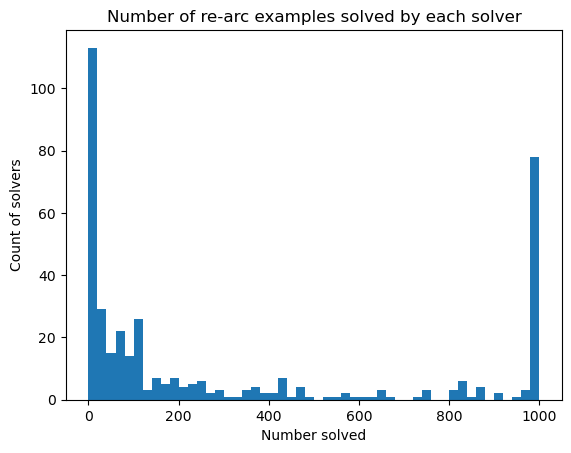

In [54]:
fig, ax = plt.subplots()
ax.hist(results['num solved'], bins = 50)
ax.set_title("Number of re-arc examples solved by each solver")
ax.set_xlabel("Number solved")
ax.set_ylabel("Count of solvers")
plt.show()

In [71]:
# A few very significant outliers
results.sort_values(by = 'runtime', ascending = False).head(40)

num solved     runtime
a64e4611          60  415.004593
22168020         104   68.346914
06df4c85          60   68.065357
d22278a0         850   22.234725
ded97339         116   16.690236
af902bf9           0   14.282784
49d1d64f        1000   12.466045
7df24a62           5   12.443942
dbc1a6ce         104   10.748839
253bf280          98    9.781173
0e206a2e          72    9.109887
50846271          50    8.570403
36fdfd69          76    7.638767
2281f1f4          23    6.641769
caa06a1f         197    6.317212
ef135b50           0    5.672703
3eda0437         750    3.822441
6aa20dc0         567    3.092014
36d67576          66    3.055519
97a05b5b          46    2.932401
cbded52d         107    2.555324
d687bc17         185    2.376024
447fd412          15    1.938049
f9012d9b         298    1.935614
c3f564a4           4    1.603432
508bd3b6          35    1.536708
23581191           2    1.521799
1f0c79e5          42    1.488586
2c608aff         439    1.457501
72322fa7         386    1.195717
484b58aa          15    1.187581
d07ae81c         975    1.175399
150deff5          23    1.150624
264363fd         350    1.139031
05269061          12    1.108375
57aa92db          68    1.048211
b775ac94         204    1.031140
e6721834         169    1.024561
d43fd935          37    1.000300
f15e1fac          75    0.988155

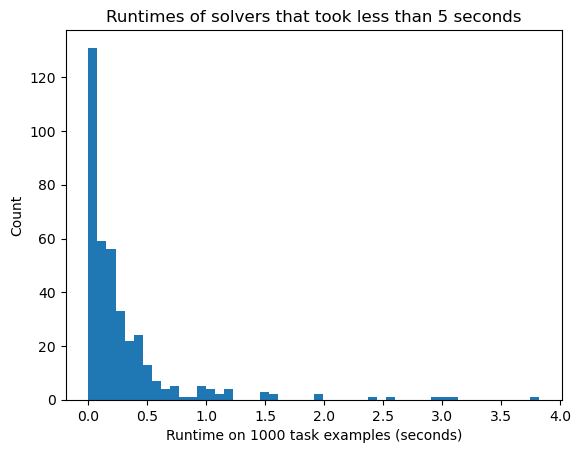

In [72]:
fig, ax = plt.subplots()
filt = results['runtime'] < 5 # Remove larger runtimes
ax.hist(results[filt]['runtime'], bins = 50)
ax.set_title("Runtimes of solvers that took less than 5 seconds")
ax.set_xlabel("Runtime on 1000 task examples (seconds)")
ax.set_ylabel("Count")
plt.show()

In [73]:
results.to_csv("re-arc_testing_results.csv")

# Testing verifiers versus re-arc tasks (all succeed)

In [5]:
verifier_functions = {label: Solver(inspect.getsource(getattr(task_verifiers, f"verify_{label}"))) for label in train_task_labels}

In [ ]:
number_re_arc_verified = {label: 0 for label in train_task_labels}
re_arc_verification_times = {label: None for label in train_task_labels}

for i, label in tqdm(enumerate(train_task_labels)):
    with open(re_arc_path / f"{label}.json", "r") as f:
        re_arc_examples = json.load(f)
    examples_verified = []
    verifier = verifier_functions[label]
    ast = lambda g: tuple(tuple(r) for r in g) # Converts grid to tuple format for DSL
    
    starttime = time.time()
    for in_out_pair in re_arc_examples:
        I = ast(in_out_pair['input'])
        O_exp = ast(in_out_pair['output'])
        O = None
        try:
            O = verifier(I)
        except:
            pass
        if O == O_exp:
            number_re_arc_verified[label] += 1
            examples_verified.append(in_out_pair)
    with open(re_arc_path / f"{label}_verified.json", "w") as f:
        json.dump(examples_verified, f)
    re_arc_verification_times[label] = time.time() - starttime

0it [00:00, ?it/s]

In [8]:
set(number_re_arc_verified.values())

{1000}

# Testing reformatted verifiers versus re-arc tasks (all succeed)

In [6]:
verifier_functions = {label: Solver(inspect.getsource(getattr(task_verifiers_reformatted, f"verify_{label}"))) for label in train_task_labels}

In [7]:
number_re_arc_verified = {label: 0 for label in train_task_labels}
re_arc_verification_times = {label: None for label in train_task_labels}

for i, label in tqdm(enumerate(train_task_labels)):
    with open(re_arc_path / f"{label}.json", "r") as f:
        re_arc_examples = json.load(f)
    examples_verified = []
    verifier = verifier_functions[label]
    ast = lambda g: tuple(tuple(r) for r in g) # Converts grid to tuple format for DSL
    
    starttime = time.time()
    for in_out_pair in re_arc_examples:
        I = ast(in_out_pair['input'])
        O_exp = ast(in_out_pair['output'])
        O = None
        try:
            O = verifier(I)
        except:
            pass
        if O == O_exp:
            number_re_arc_verified[label] += 1
            examples_verified.append(in_out_pair)
    with open(re_arc_path / f"{label}_verified.json", "w") as f:
        json.dump(examples_verified, f)
    re_arc_verification_times[label] = time.time() - starttime

0it [00:00, ?it/s]

In [8]:
set(number_re_arc_verified.values())

{1000}

# Testing vanilla solvers versus vanilla tasks (all succeed)

In [9]:
solver_functions = verifier_functions = {label: Solver(inspect.getsource(getattr(task_solvers, f"solve_{label}"))) for label in train_task_labels}

In [39]:
number_solved = {label: 0 for label in train_task_labels}
total_failed = 0
solving_times = {label: None for label in train_task_labels}

for i, label in tqdm(enumerate(train_task_labels)):
    examples = train_tasks[label]['train']
    for j in range(len(train_tasks[label]['test'])):
        examples.append({'input': train_tasks[label]['test'][j]['input'],
                         'output': train_sols[label][j]}
                       )
        print(label)
        #print(examples[-1])
    solver = solver_functions[label]
    ast = lambda g: tuple(tuple(r) for r in g) # Converts grid to tuple format for DSL
    starttime = time.time()
    for in_out_pair in examples:
        I = ast(in_out_pair['input'])
        print(in_out_pair['input'])
        O_exp = ast(in_out_pair['output'])
        O = None
        try:
            O = solver(I)
        except:
            print(label)
            print(in_out_pair)
            total_failed += 1
        if O == O_exp:
            number_solved[label] += 1
    solving_times[label] = time.time()-starttime

0it [00:00, ?it/s]

007bbfb7
29
[[0, 7, 7], [7, 7, 7], [0, 7, 7]]
[[4, 0, 4], [0, 0, 0], [0, 4, 0]]
[[0, 0, 0], [0, 0, 2], [2, 0, 2]]
[[6, 6, 0], [6, 0, 0], [0, 6, 6]]
[[2, 2, 2], [0, 0, 0], [0, 2, 2]]
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
[[7, 0, 7], [7, 0, 7], [7, 7

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'input': [[0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0], [4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4], [0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4], [4, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4], [4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0], [0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 4, 4], [0, 4, 0, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
print(total_failed)

264


# Scratch work examining vanilla solvers that got 0 correct

In [74]:
bad_solver_labels = list(results[results['num solved'] == 0].index)







 234bbc79


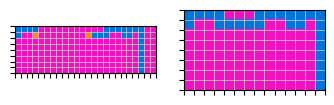

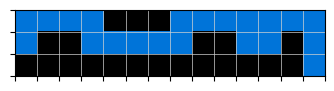

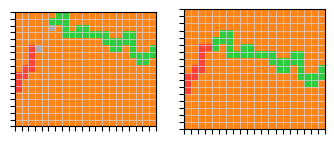

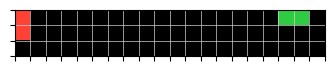

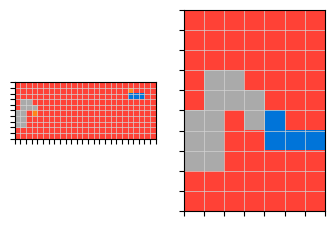

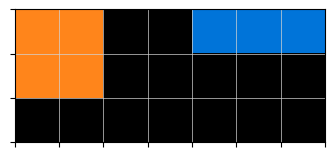

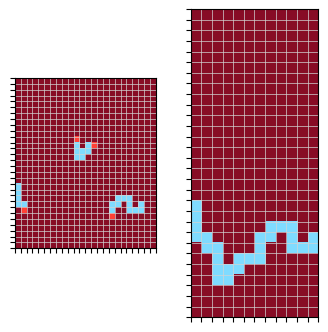

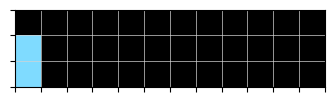

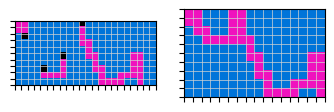

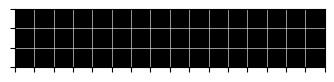

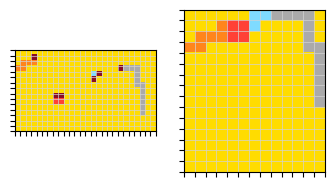

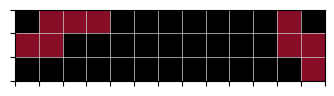

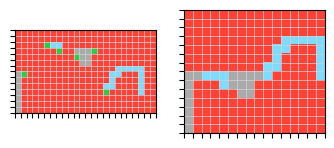

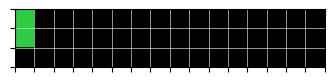

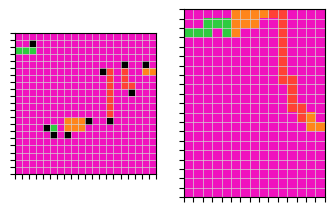

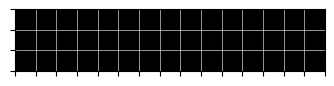

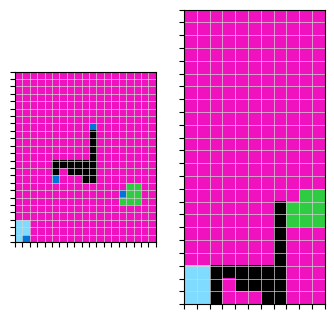

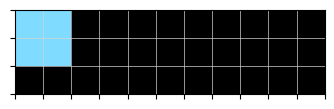

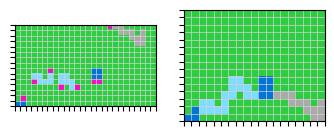

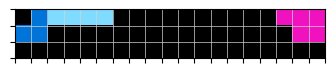







 28e73c20


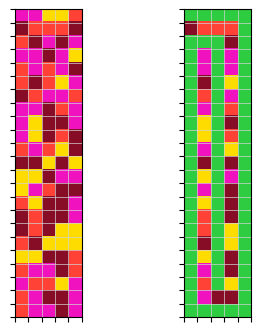

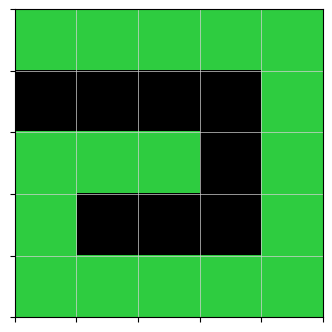

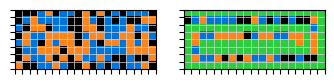

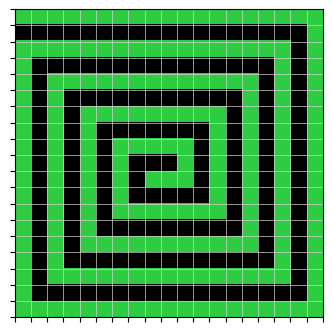

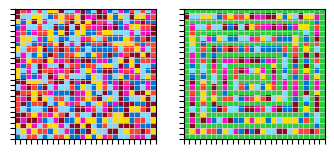

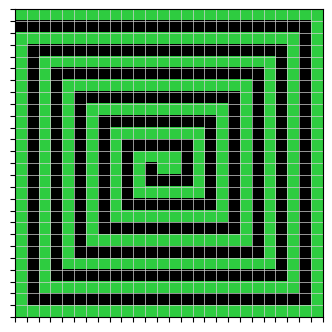

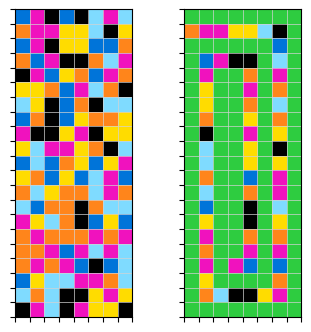

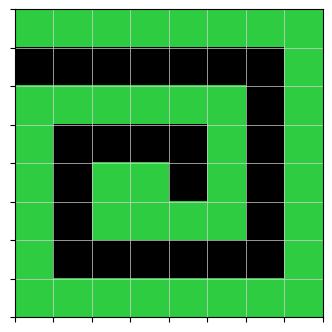

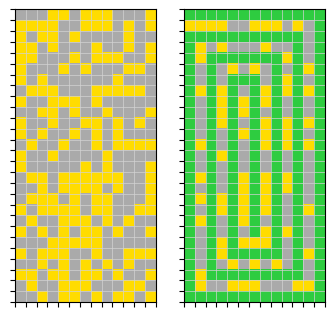

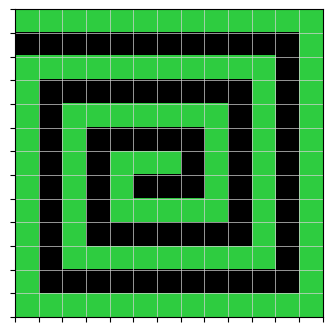

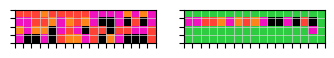

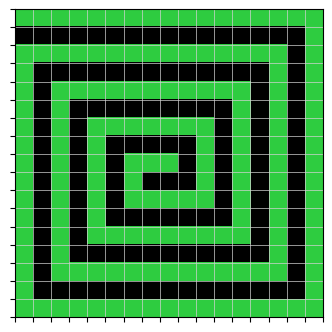

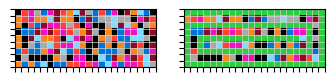

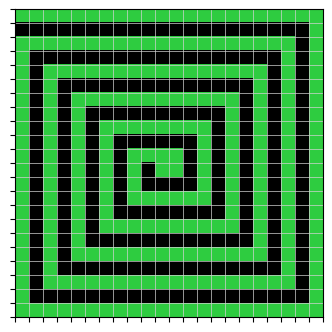

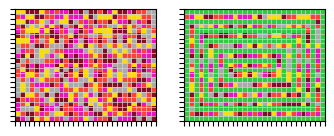

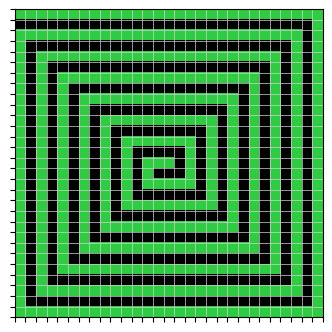

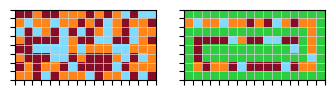

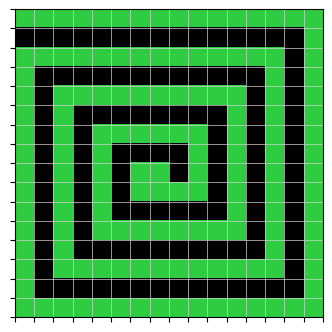

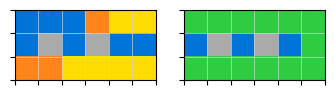

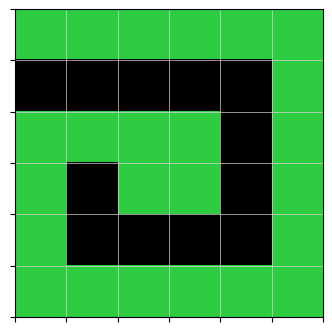







 31aa019c


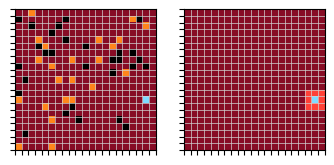

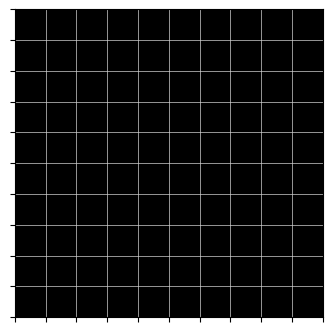

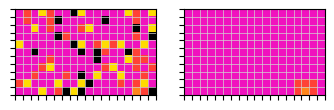

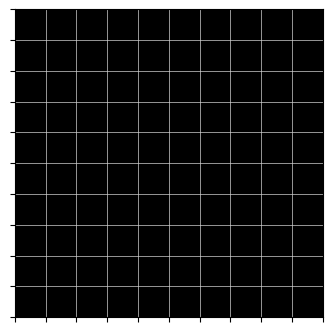

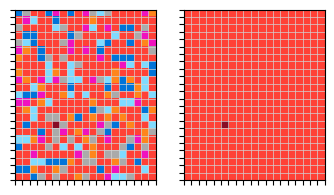

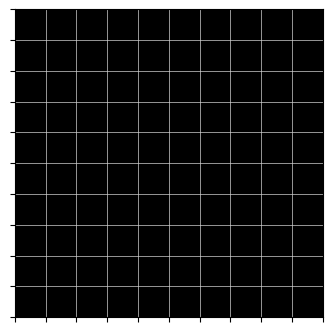

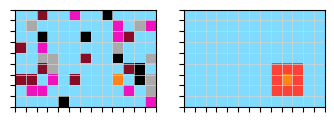

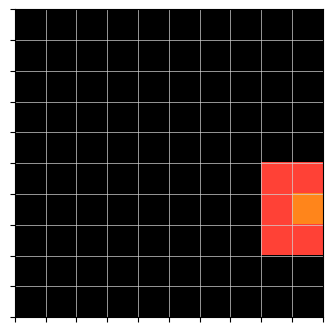

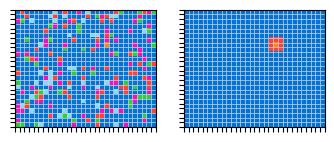

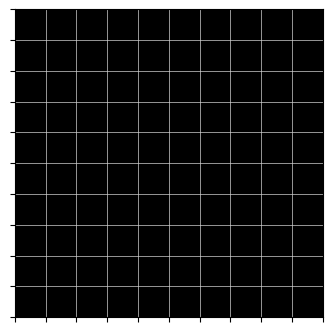

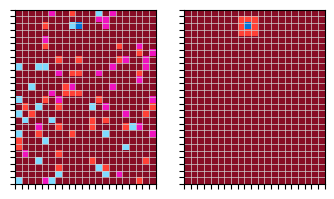

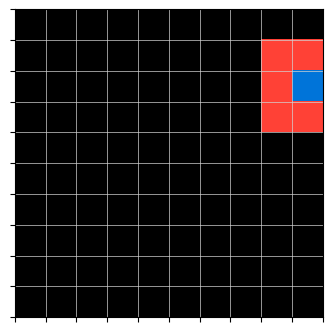

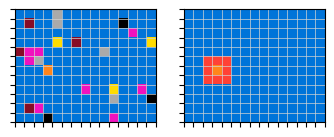

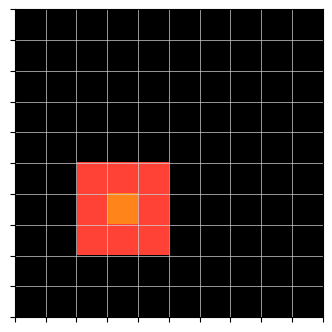

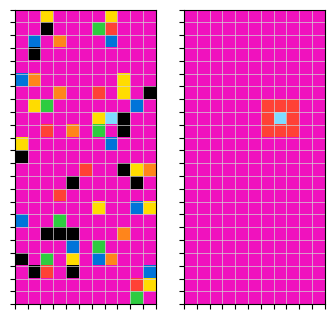

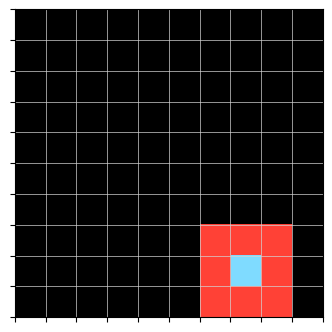

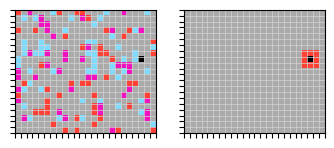

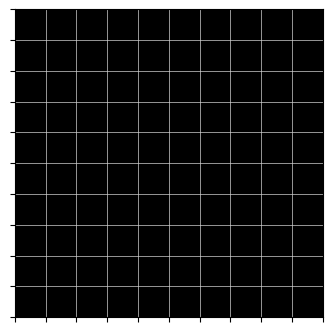

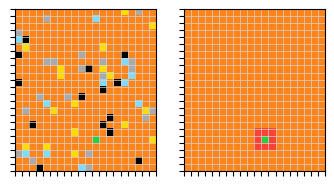

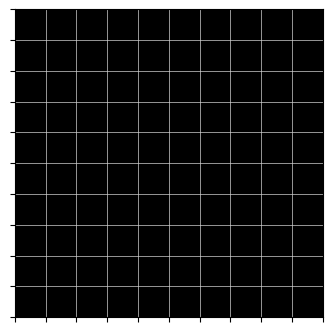







 3428a4f5


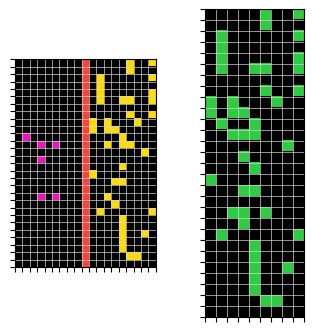

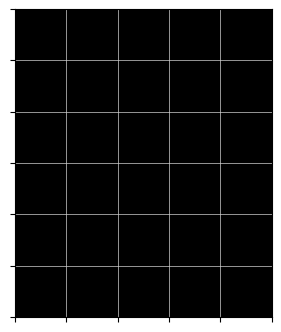

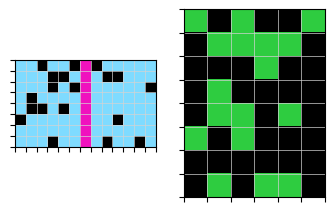

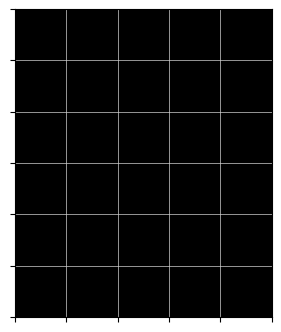

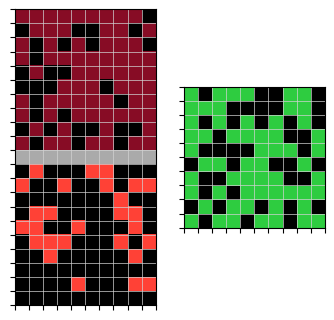

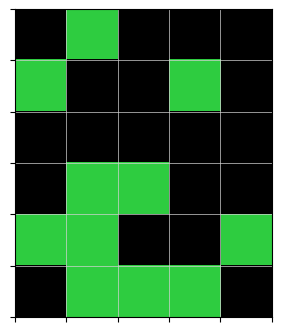

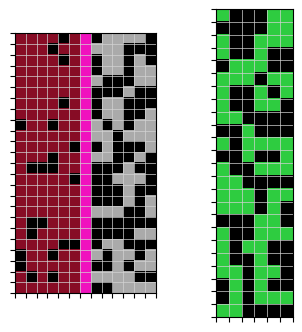

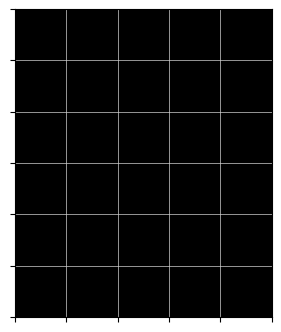

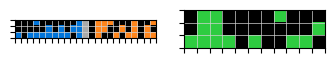

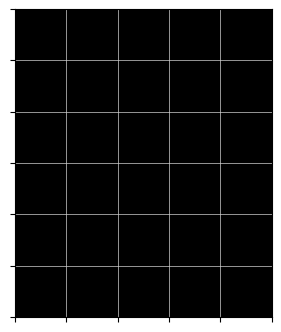

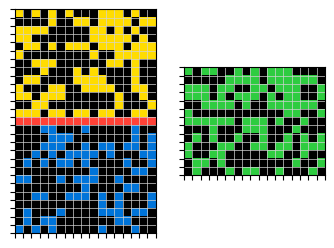

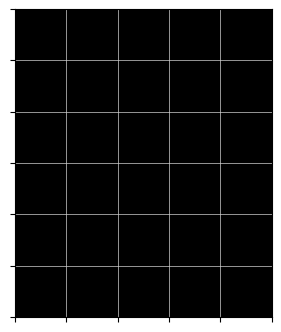

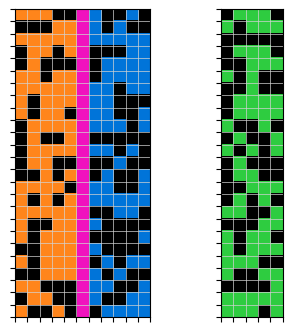

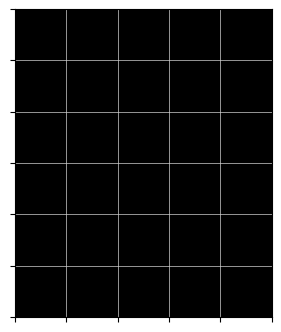

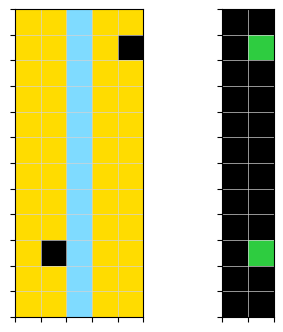

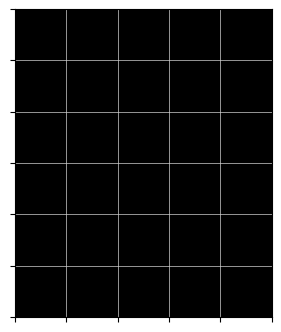

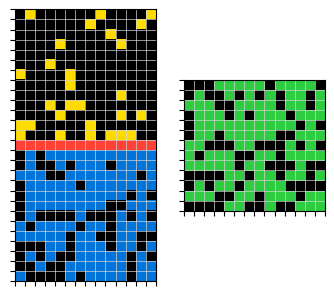

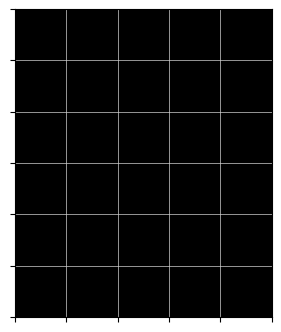

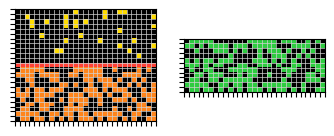

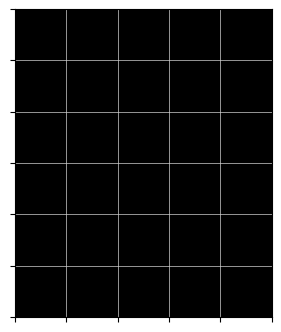







 363442ee


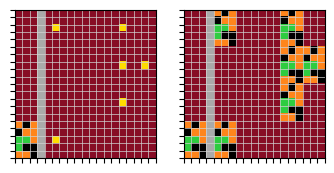

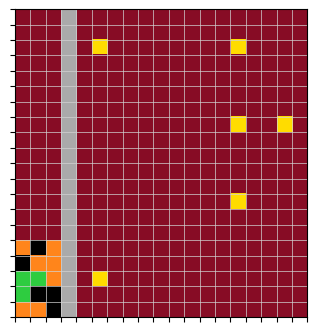

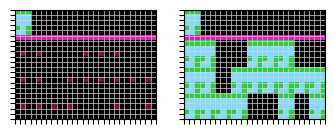

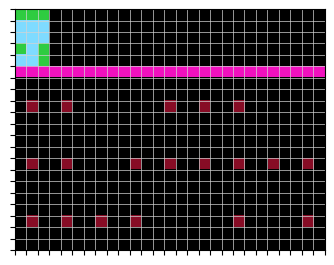

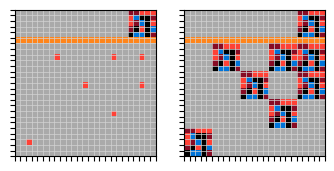

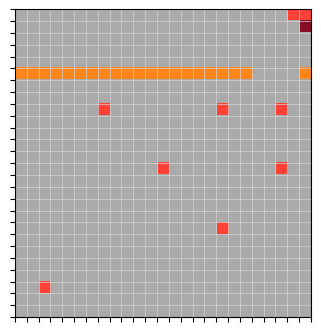

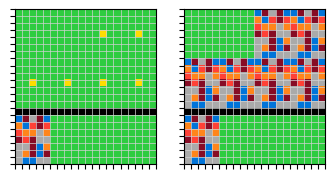

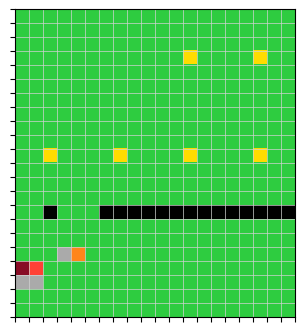

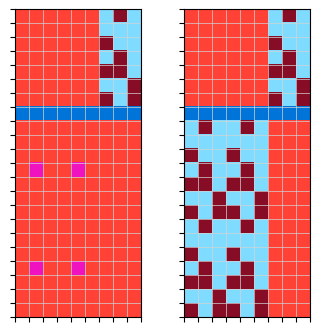

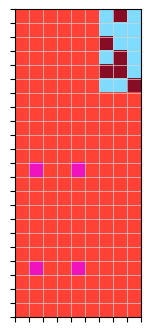

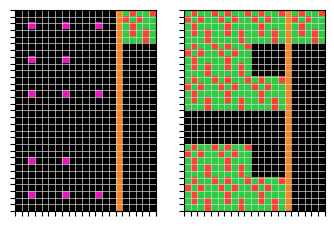

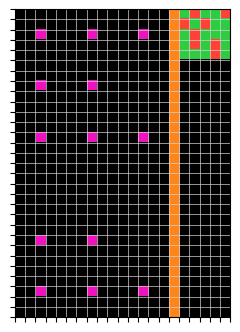

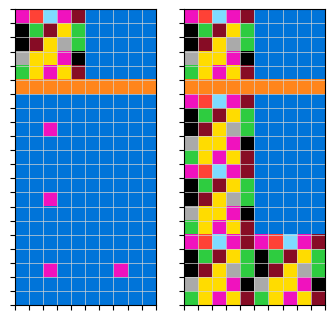

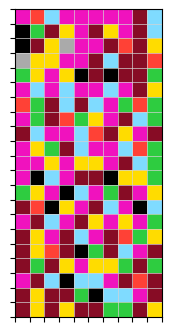

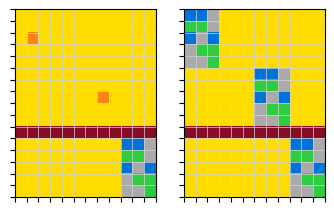

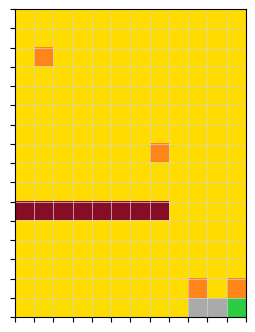

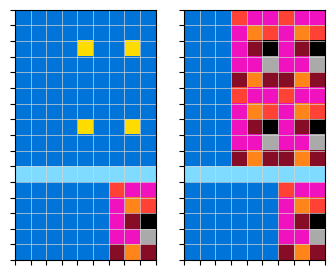

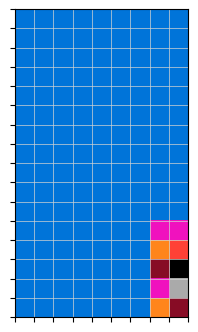

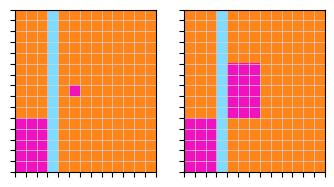

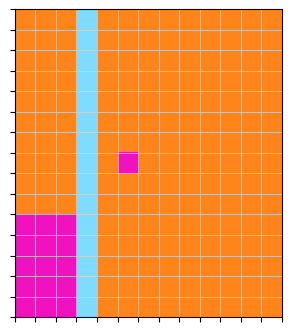







 4522001f


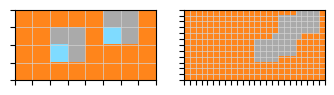

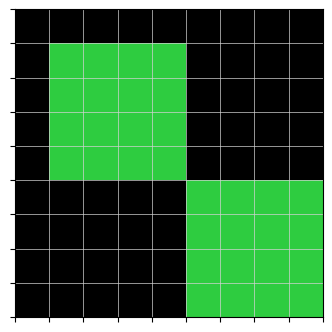

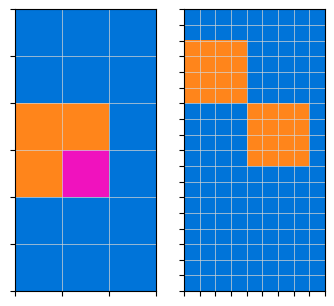

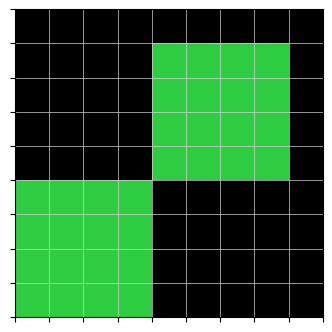

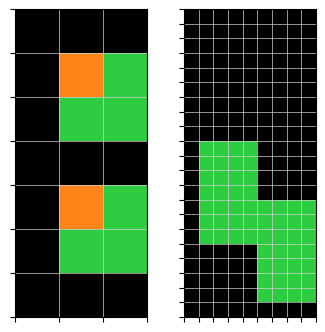

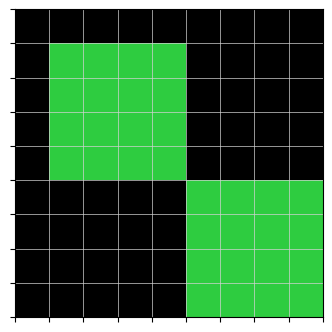

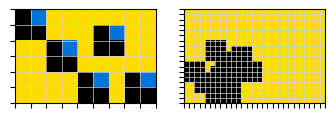

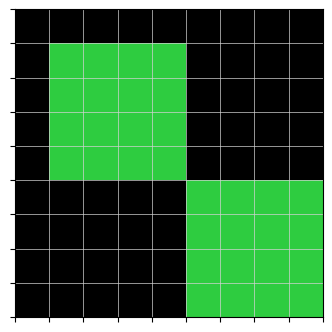

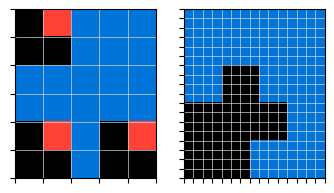

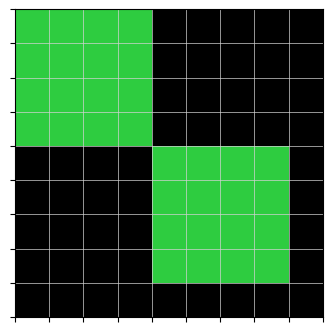

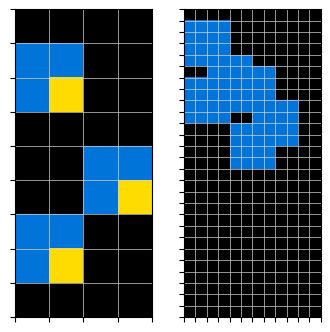

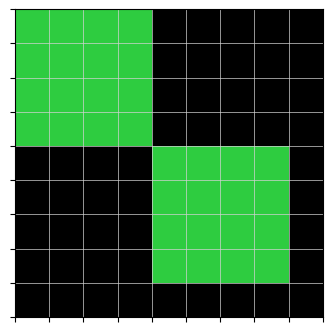

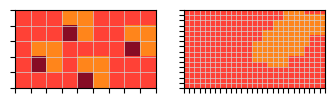

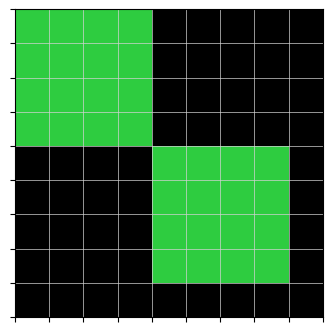

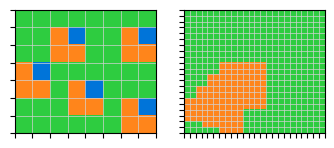

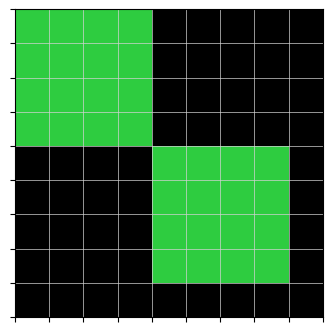

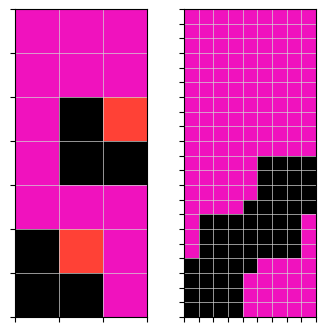

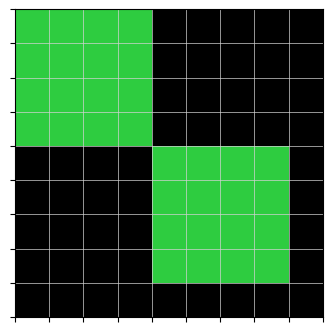

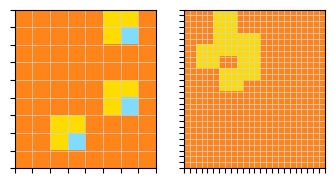

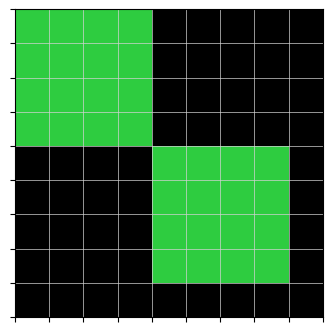







 4938f0c2


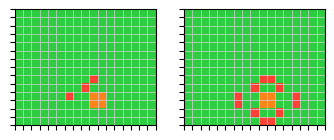

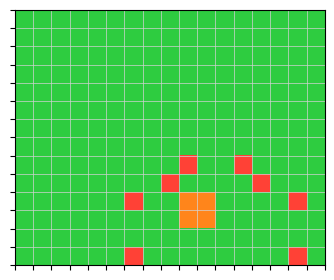

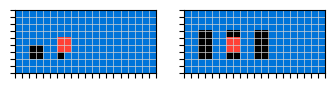

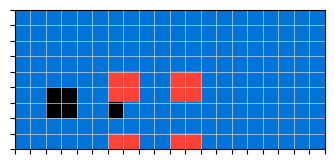

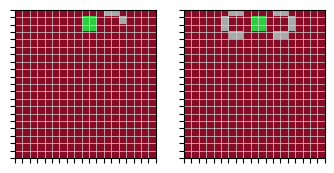

Solver failed.


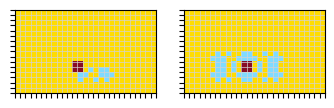

Solver failed.


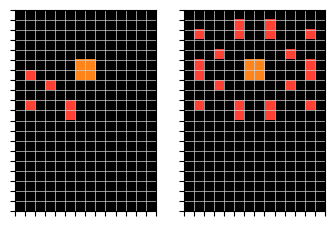

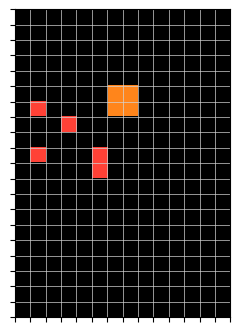

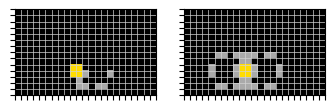

Solver failed.


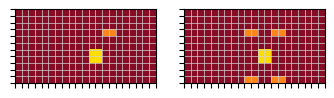

Solver failed.


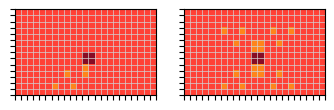

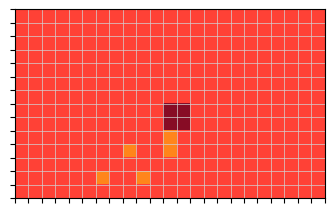

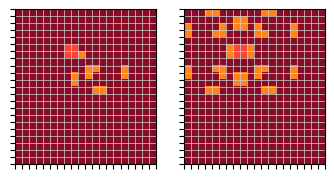

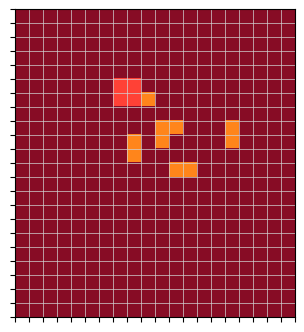

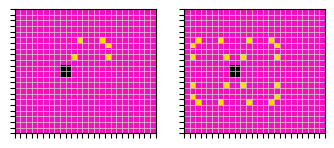

Solver failed.






 496994bd


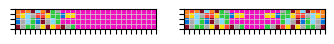

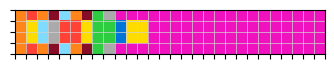

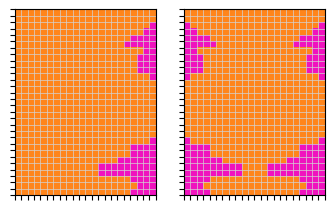

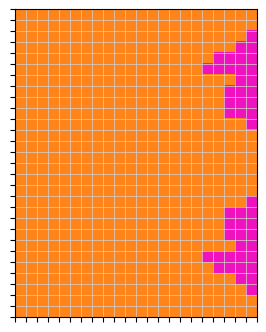

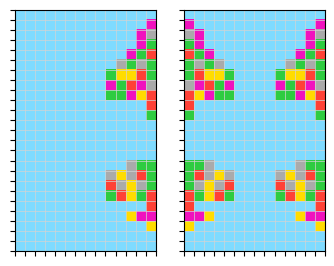

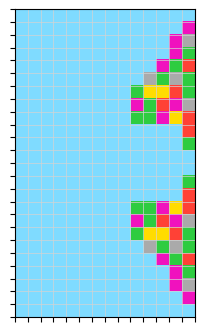

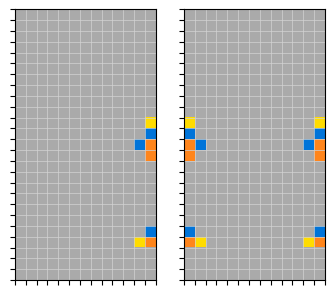

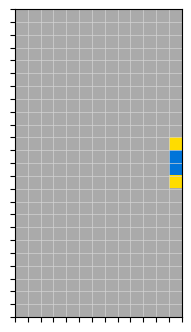

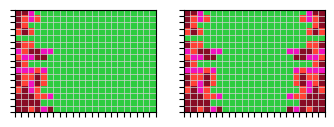

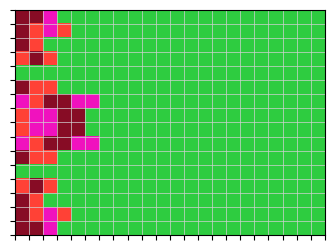

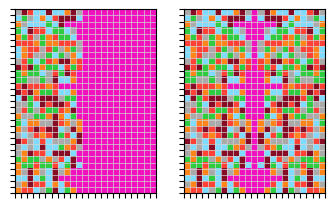

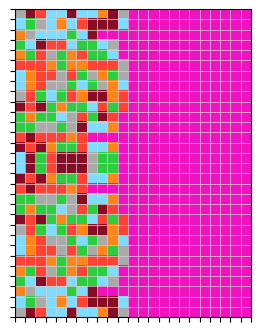

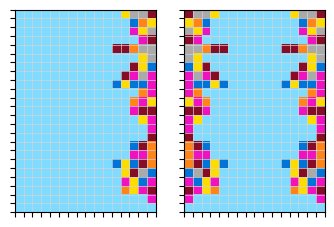

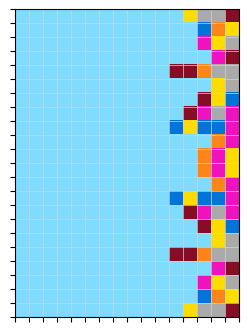

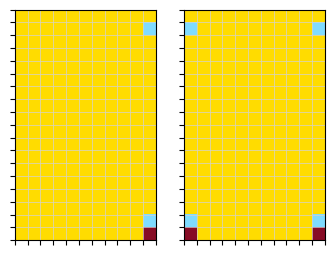

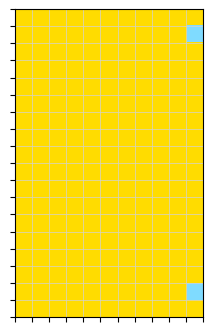

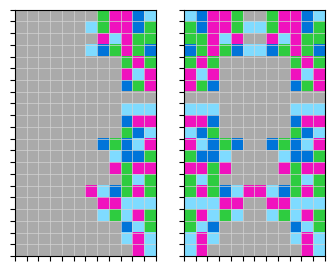

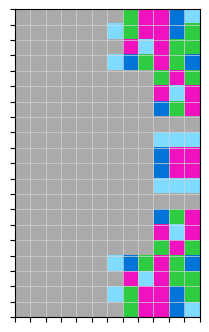

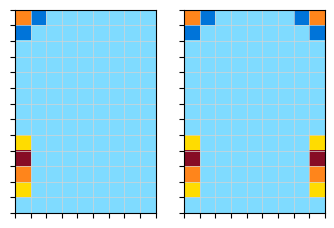

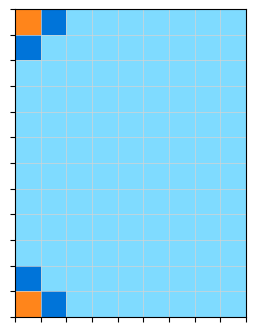







 53b68214


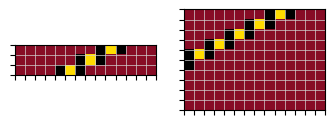

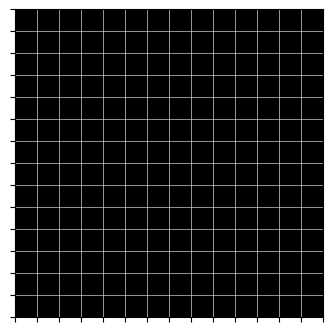

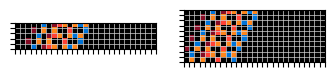

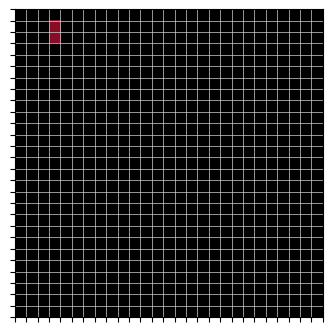

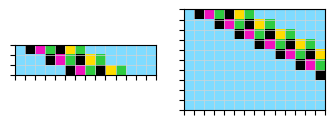

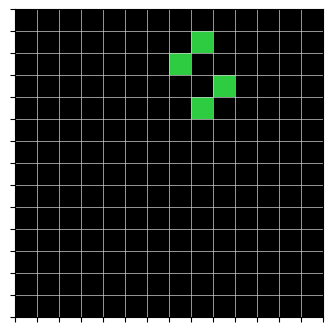

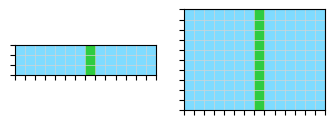

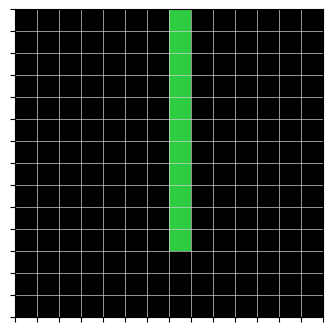

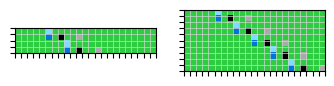

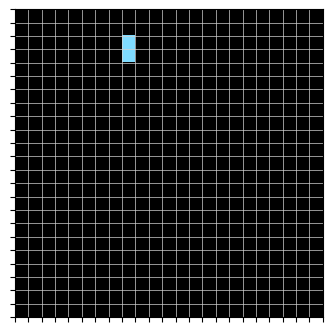

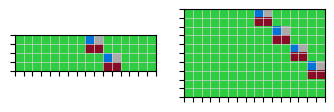

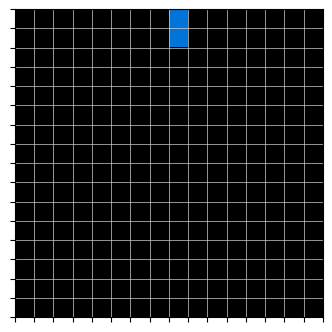

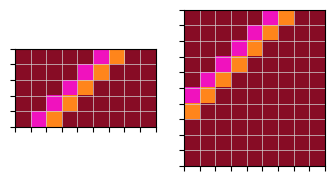

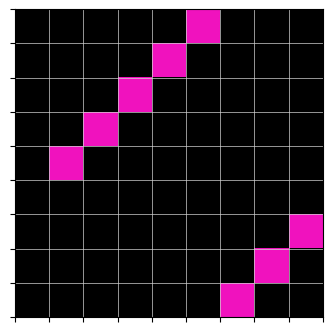

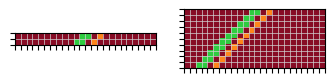

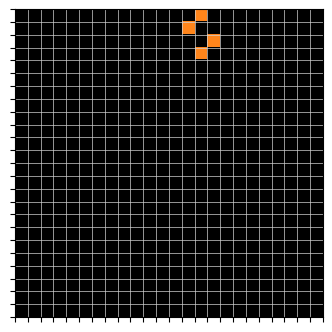

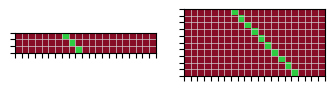

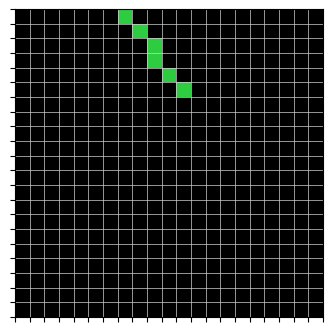

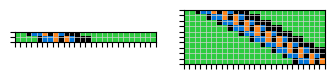

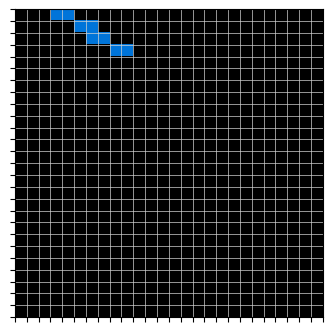







 54d9e175


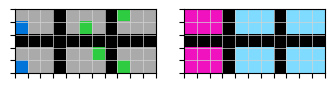

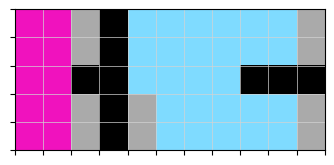

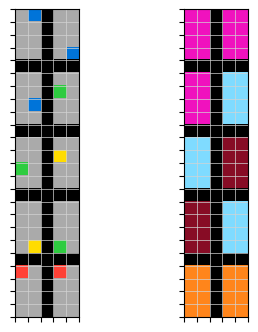

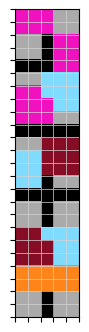

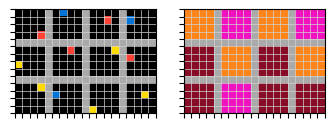

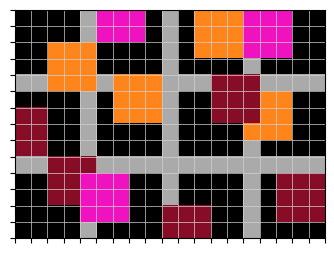

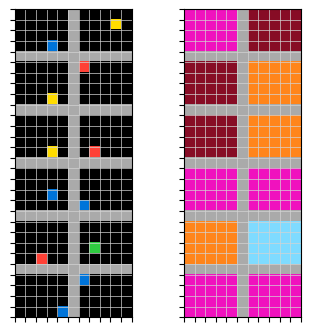

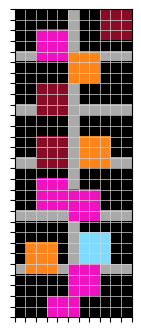

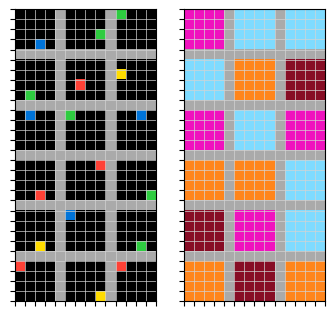

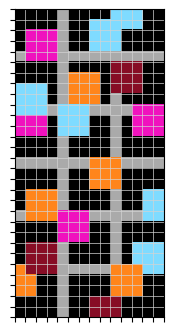

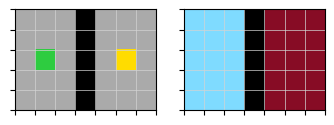

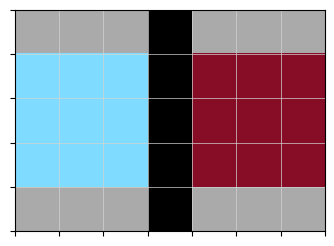

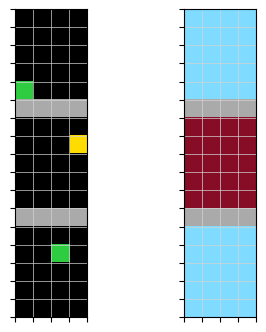

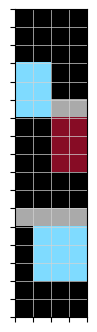

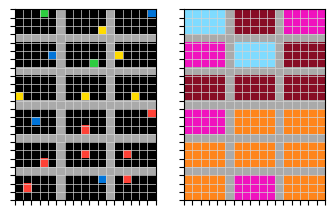

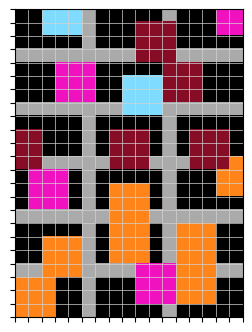

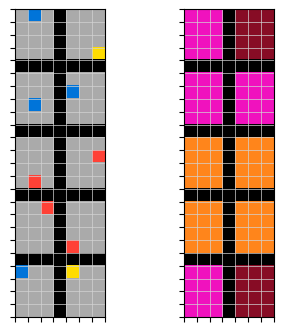

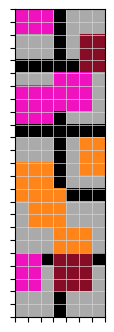

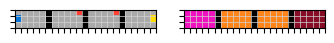

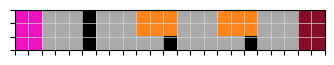







 5582e5ca


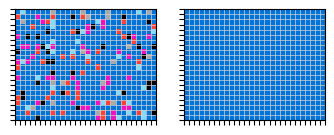

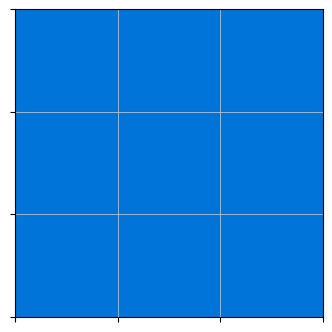

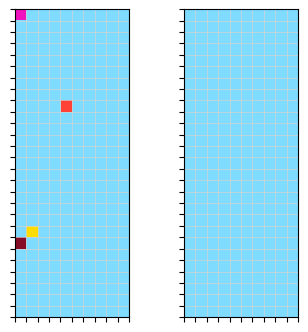

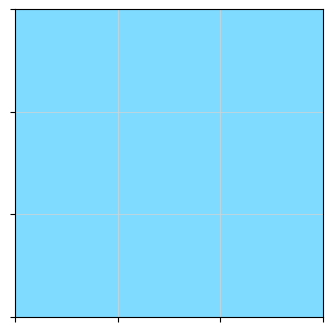

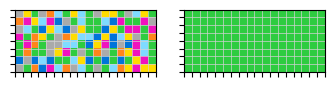

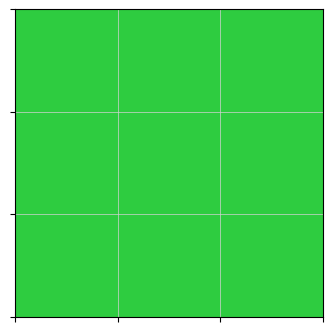

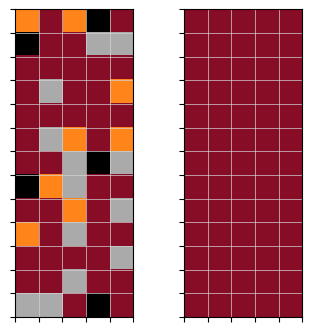

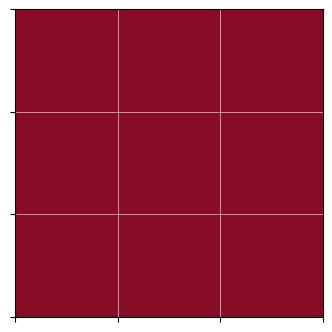

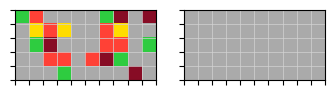

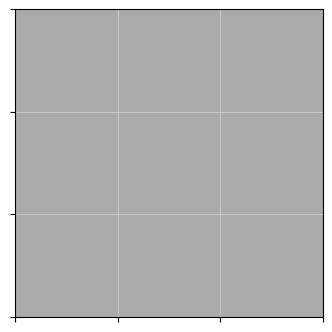

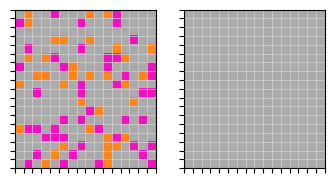

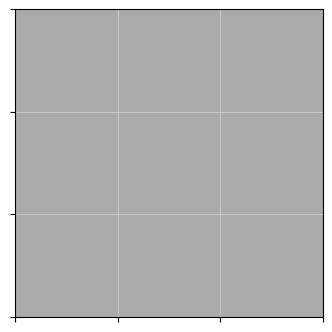

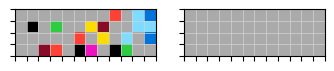

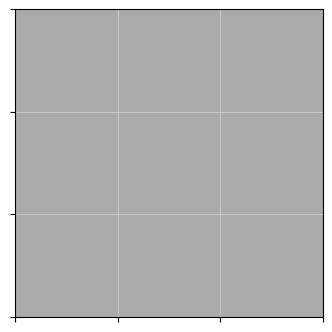

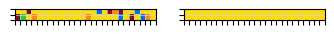

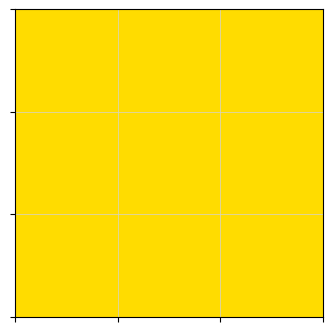

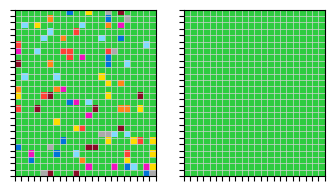

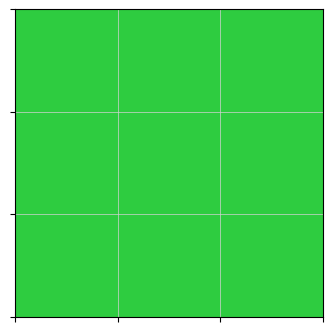

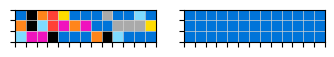

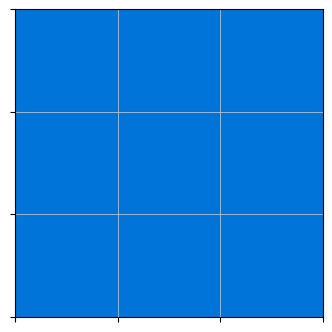







 6430c8c4


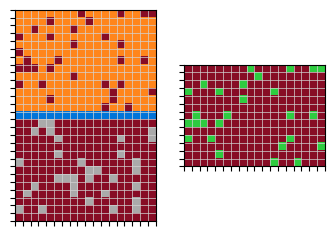

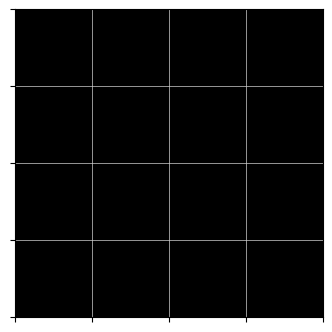

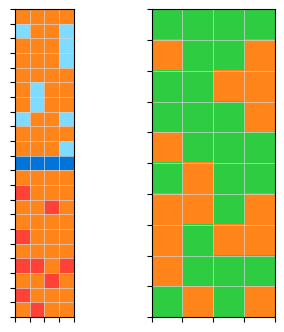

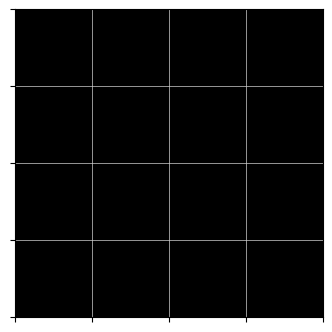

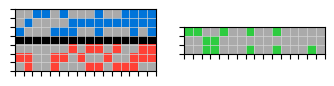

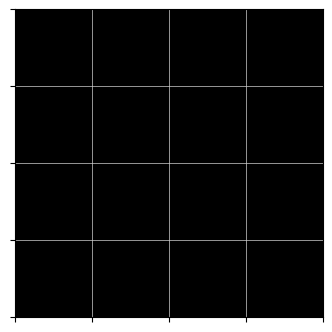

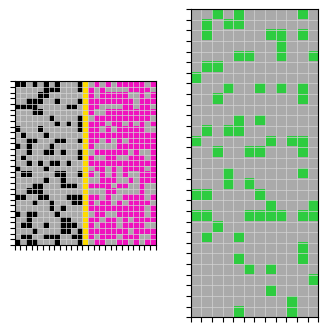

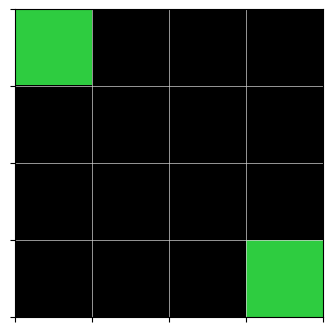

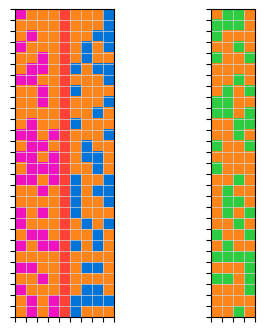

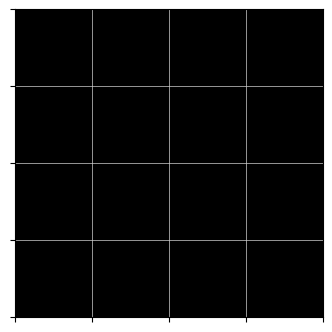

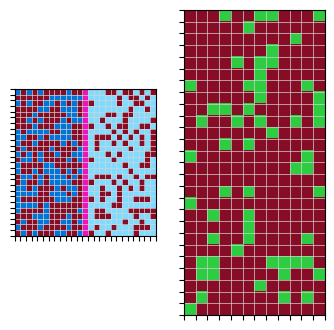

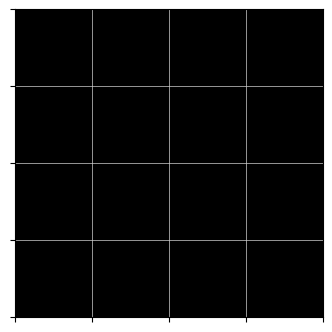

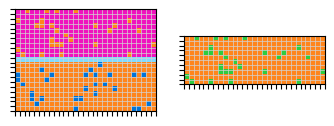

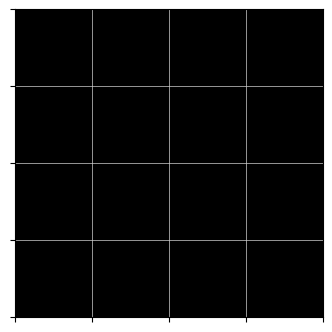

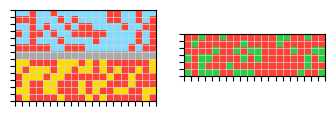

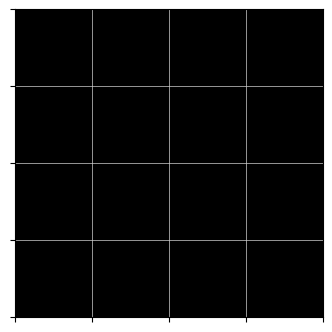

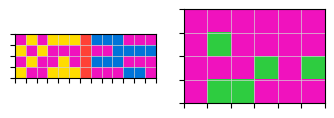

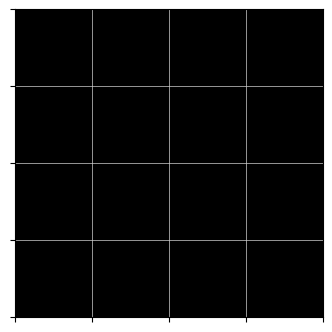

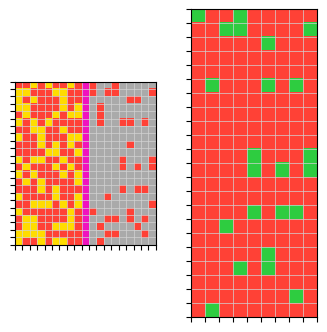

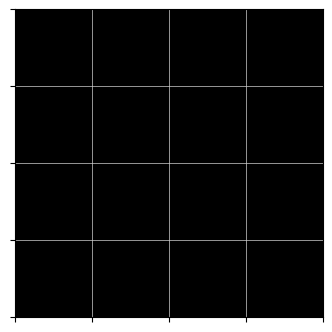







 77fdfe62


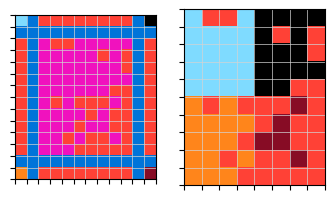

Solver failed.


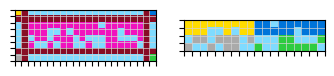

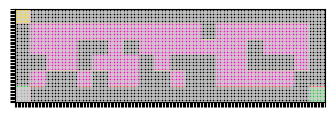

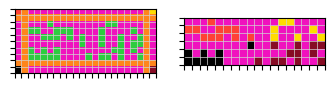

Solver failed.


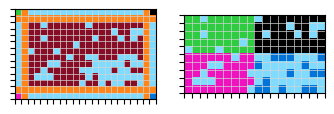

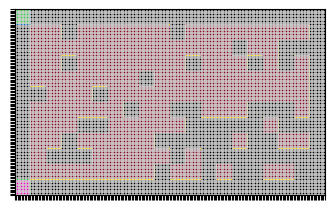

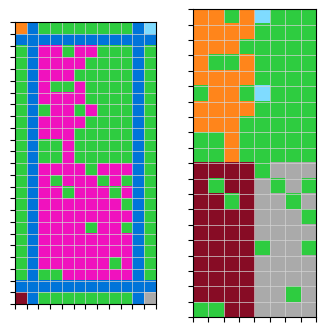

Solver failed.


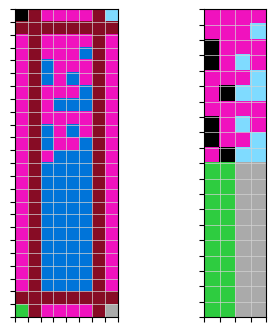

Solver failed.


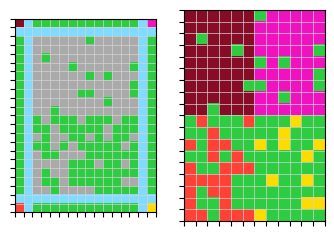

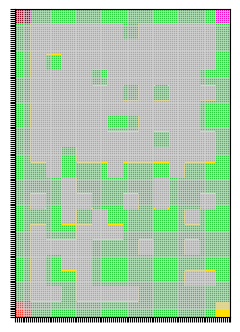

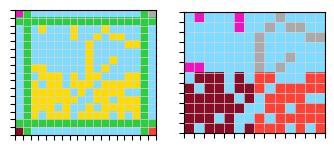

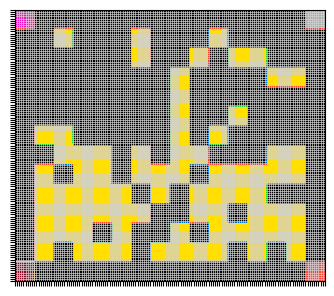

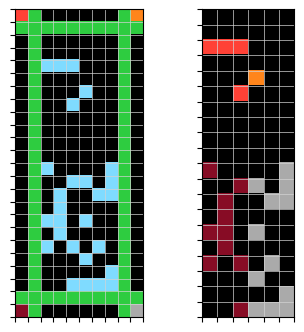

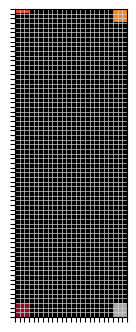

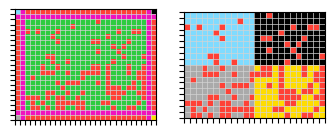

Solver failed.






 7c008303


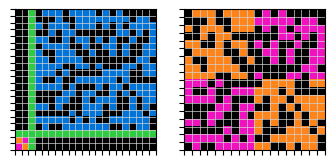

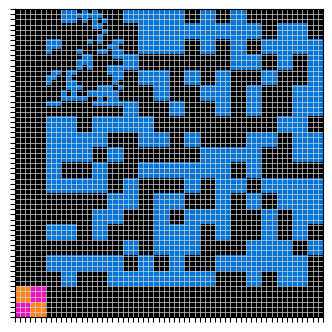

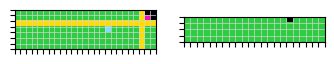

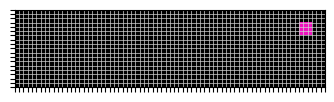

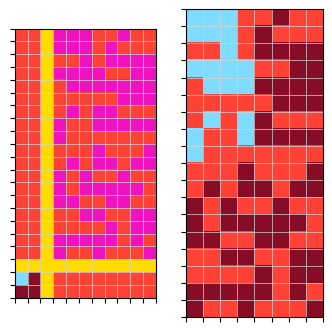

Solver failed.


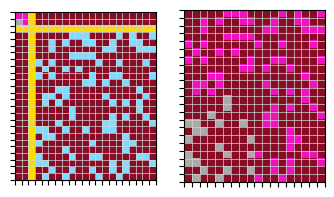

Solver failed.


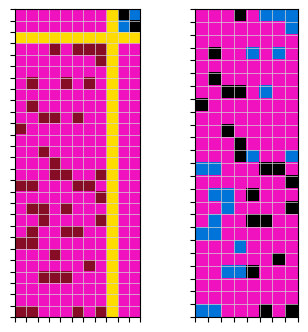

Solver failed.


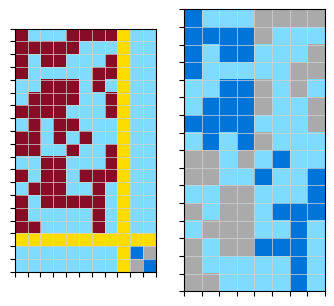

Solver failed.


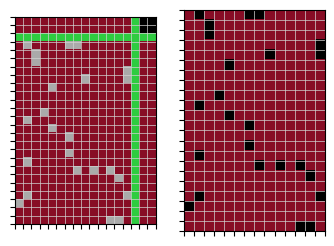

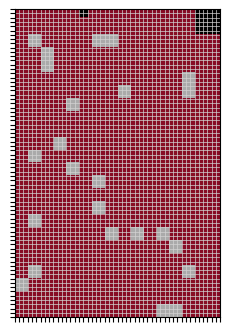

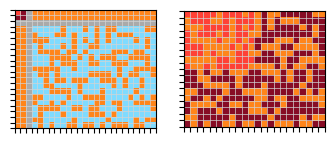

Solver failed.


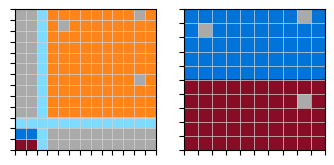

Solver failed.


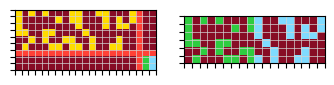

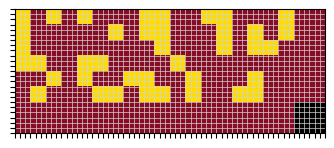







 88a10436


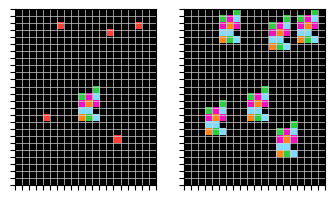

Solver failed.


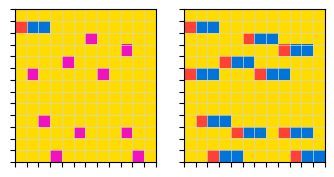

Solver failed.


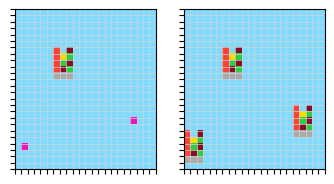

Solver failed.


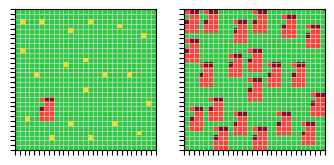

Solver failed.


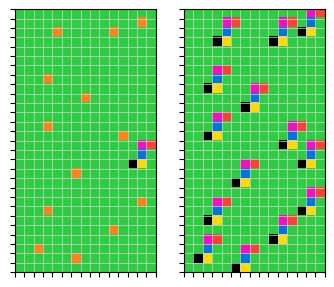

Solver failed.


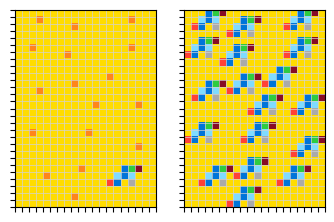

Solver failed.


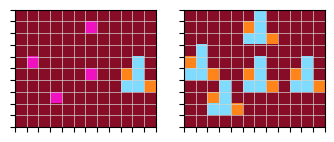

Solver failed.


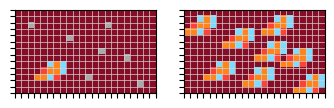

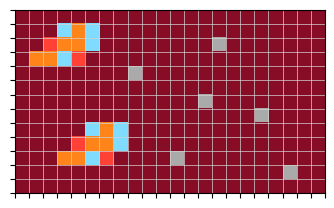

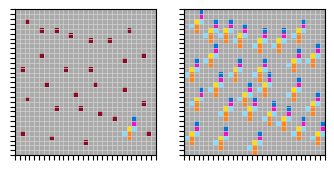

Solver failed.


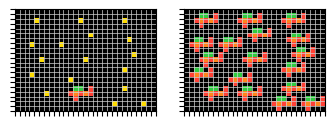

Solver failed.






 8a004b2b


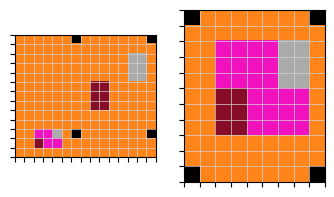

Solver failed.


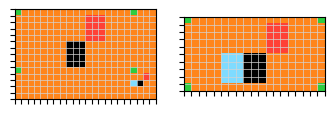

Solver failed.


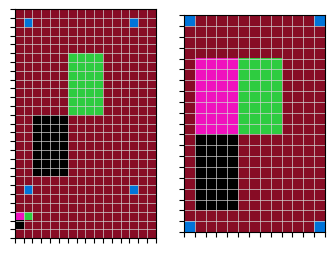

Solver failed.


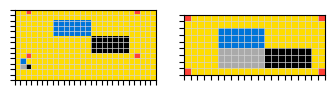

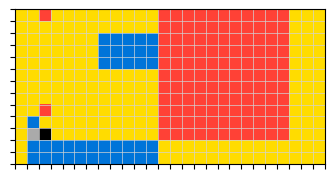

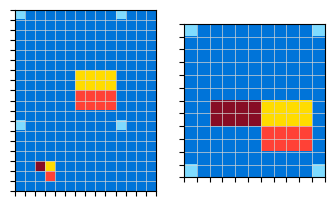

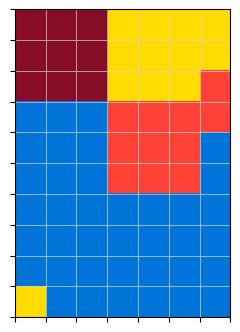

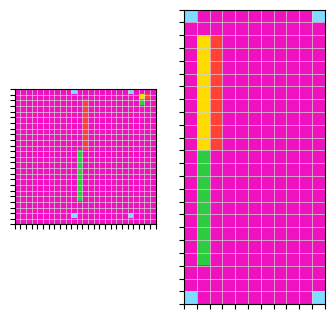

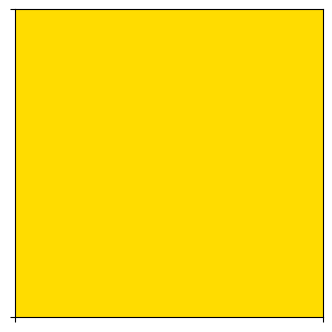

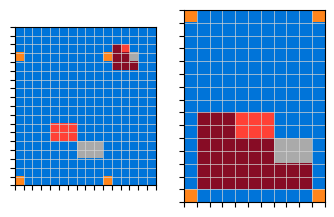

Solver failed.


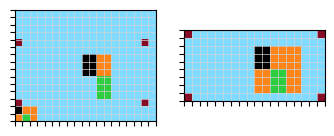

Solver failed.


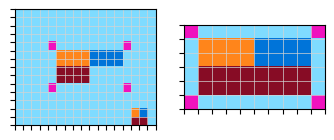

Solver failed.


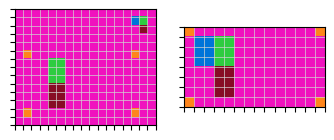

Solver failed.






 94f9d214


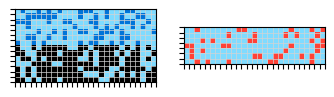

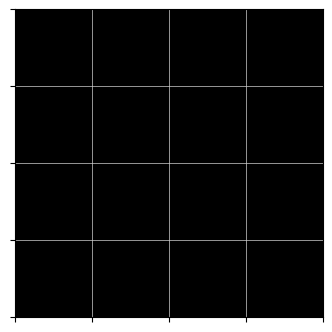

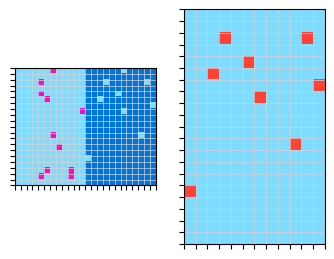

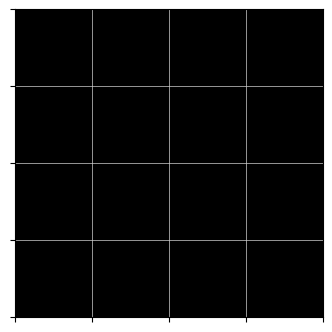

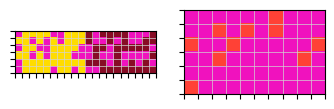

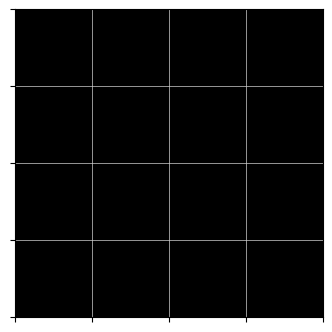

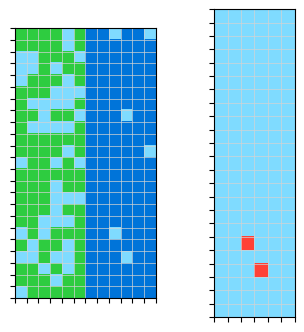

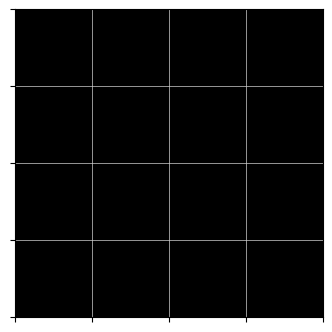

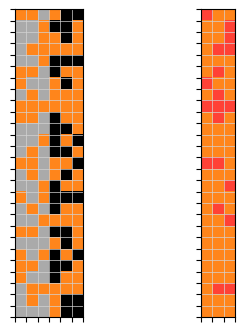

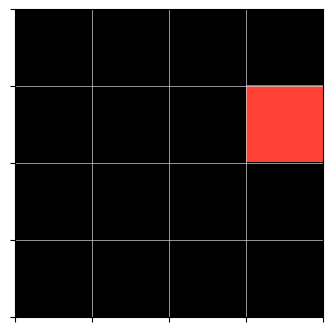

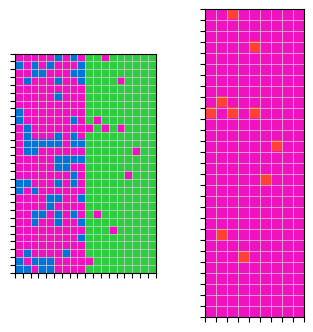

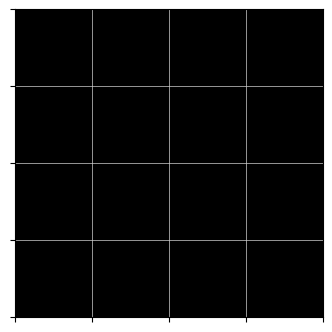

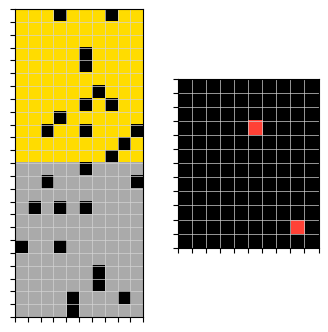

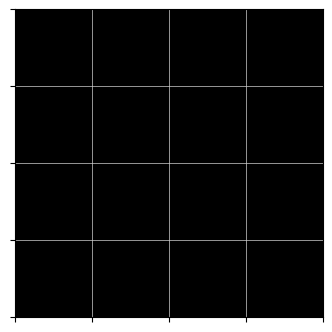

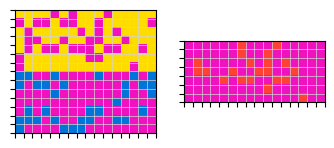

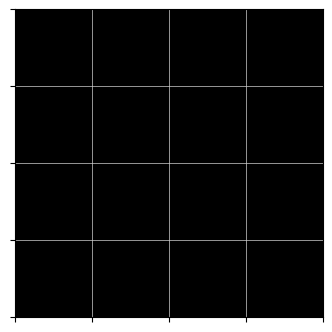

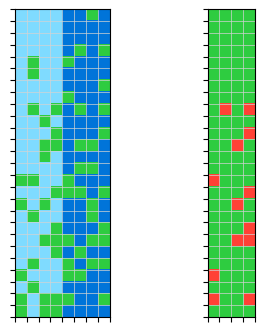

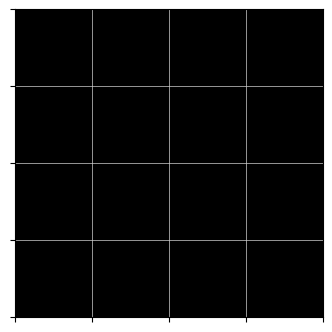

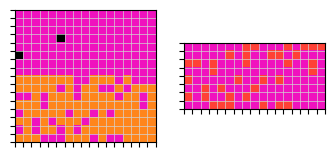

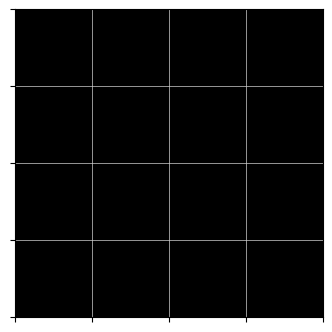







 a1570a43


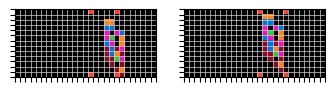

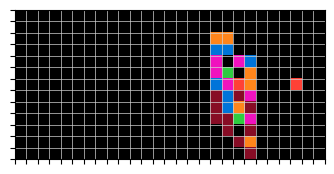

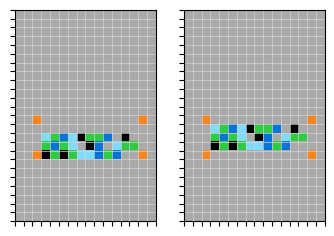

Solver failed.


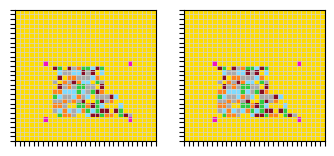

Solver failed.


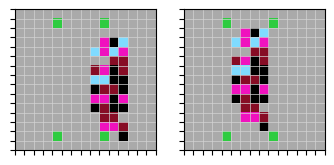

Solver failed.


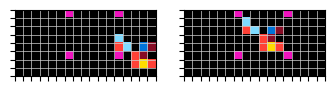

Solver failed.


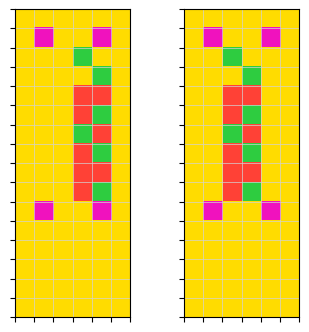

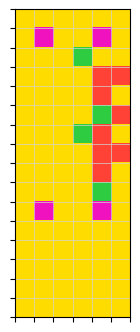

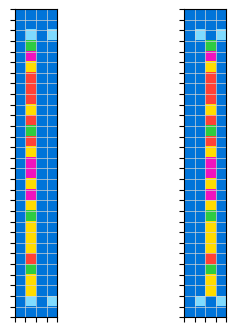

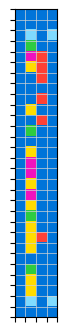

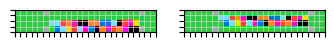

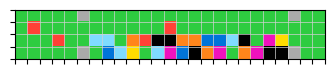

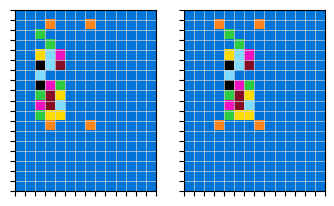

Solver failed.


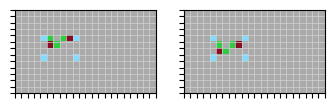

Solver failed.






 a78176bb


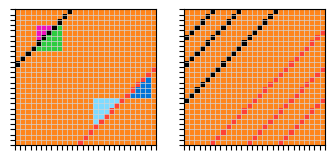

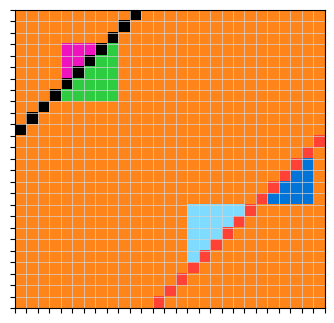

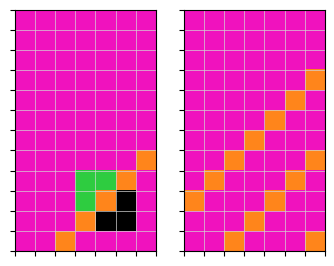

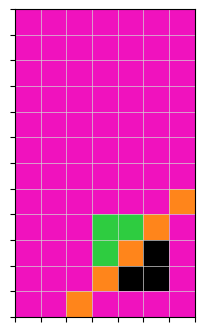

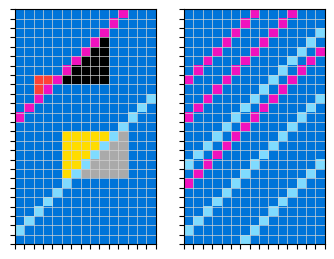

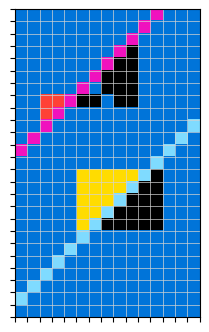

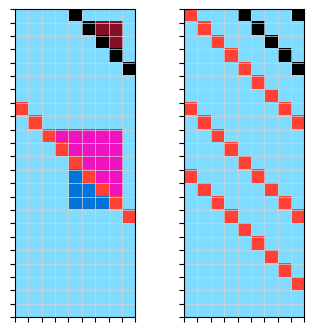

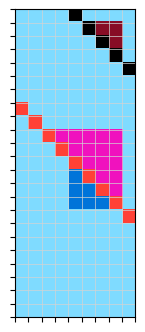

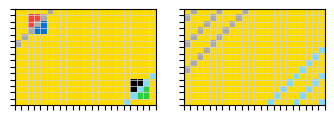

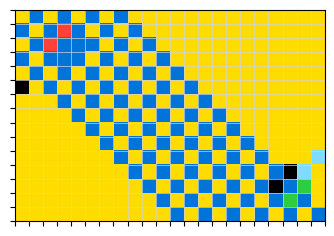

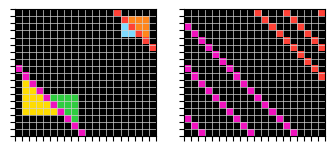

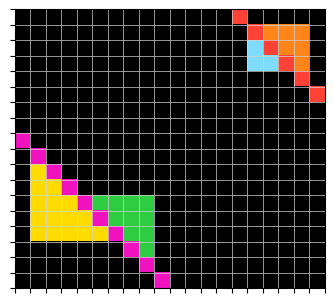

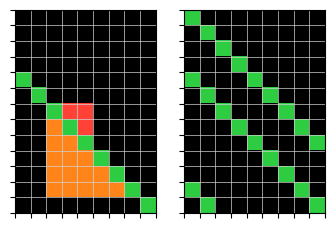

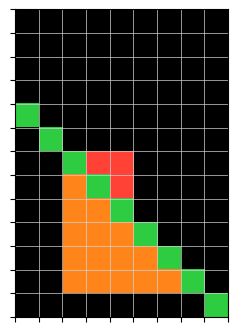

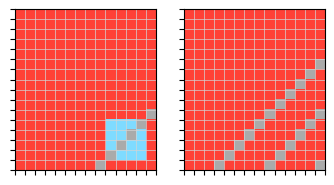

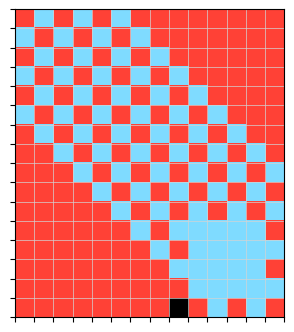

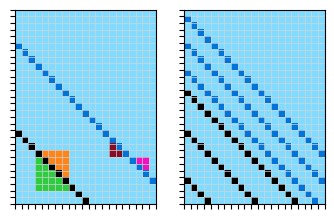

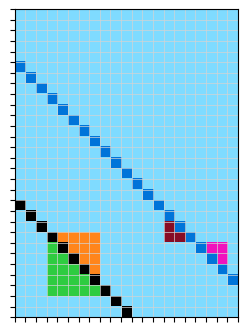

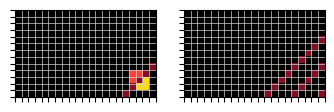

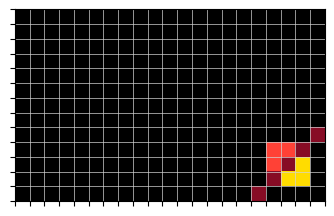







 a8c38be5


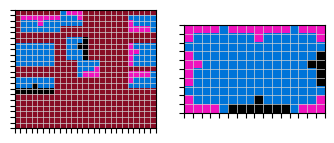

Solver failed.


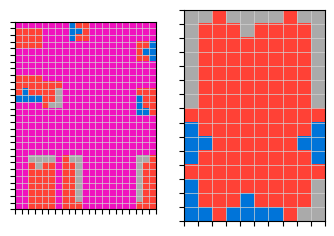

Solver failed.


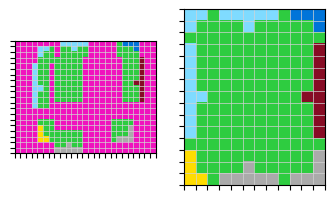

Solver failed.


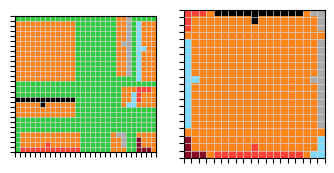

Solver failed.


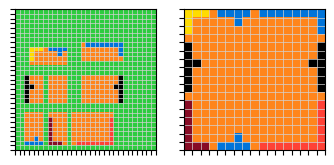

Solver failed.


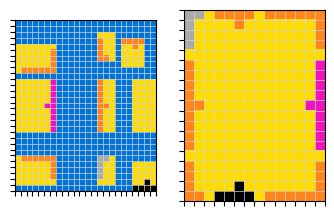

Solver failed.


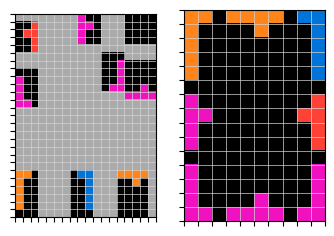

Solver failed.


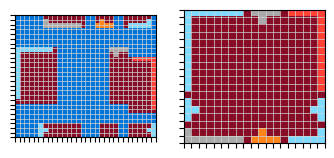

Solver failed.


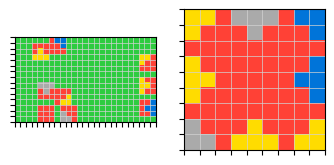

Solver failed.


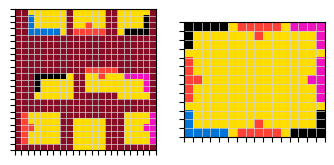

Solver failed.






 af902bf9


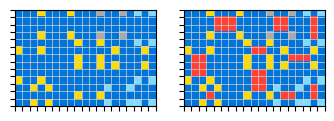

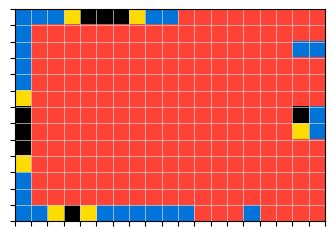

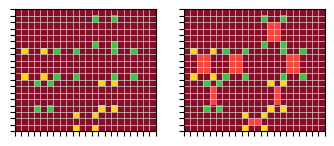

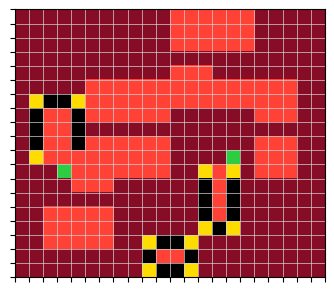

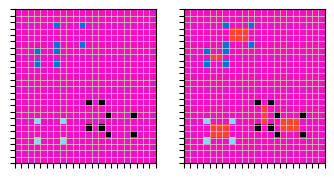

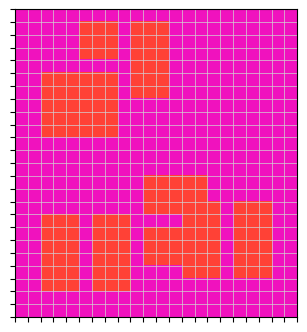

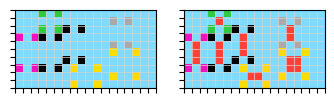

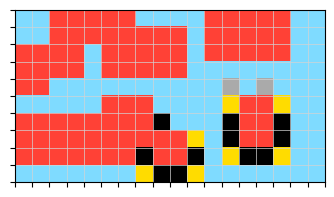

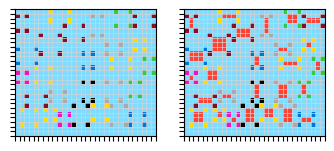

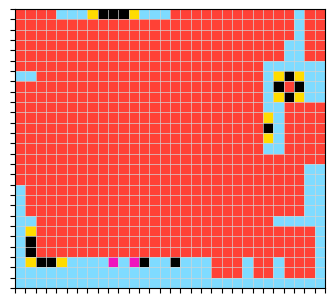

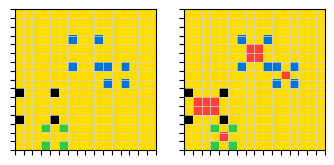

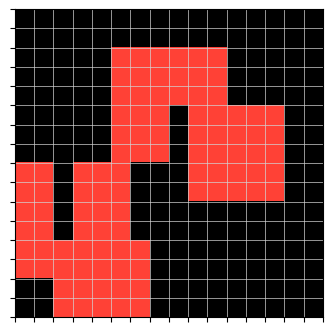

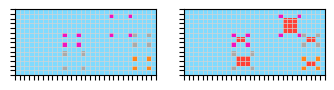

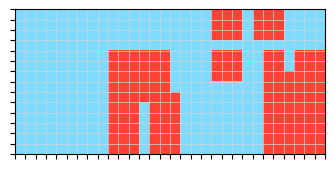

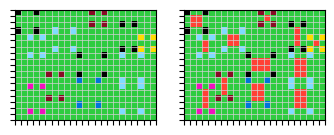

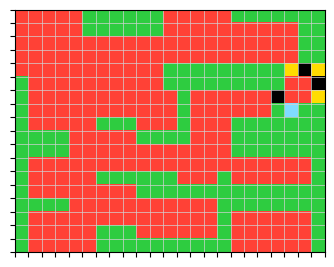

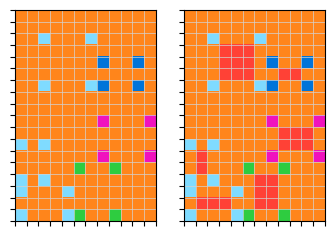

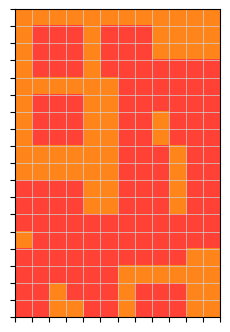

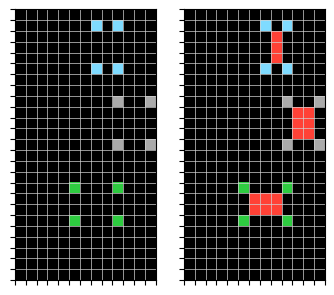

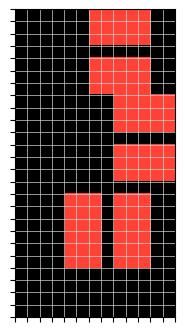







 ce4f8723


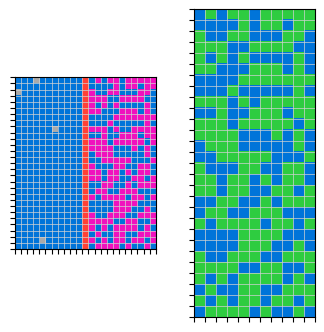

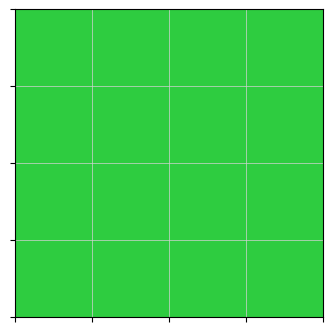

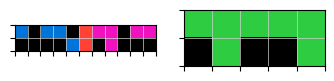

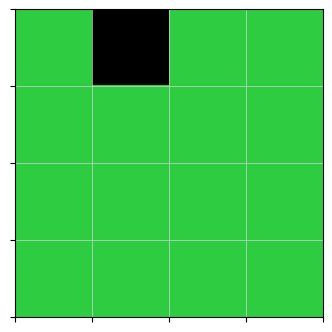

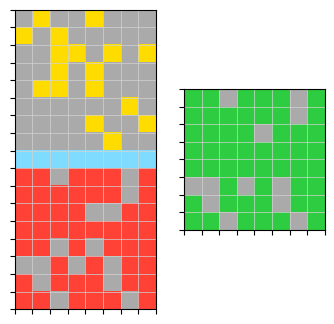

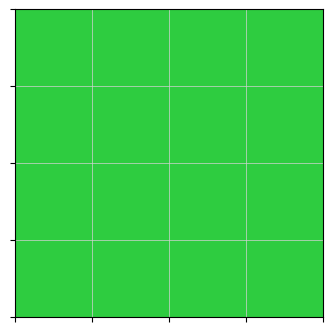

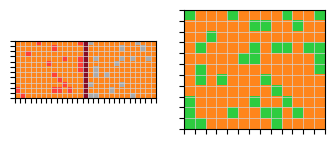

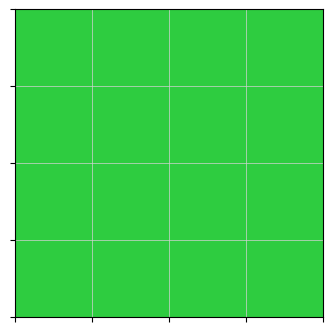

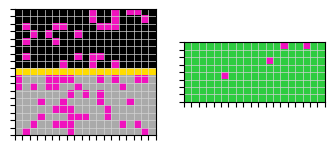

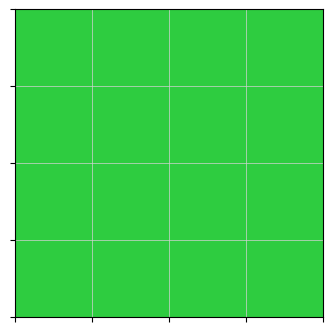

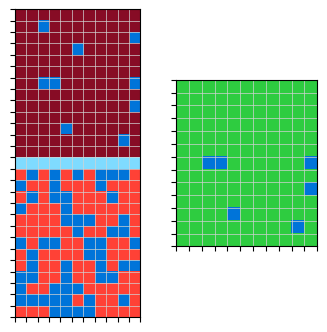

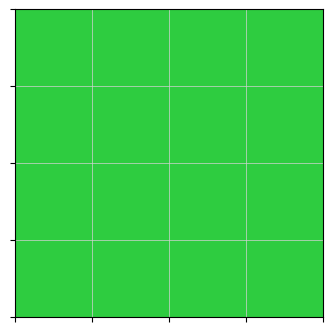

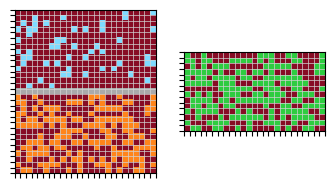

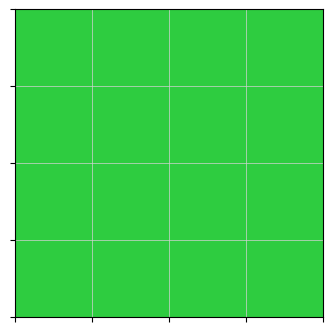

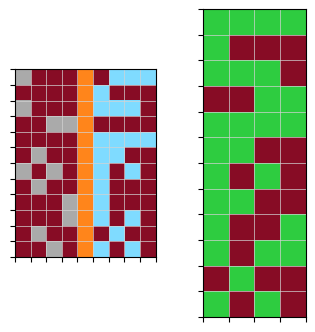

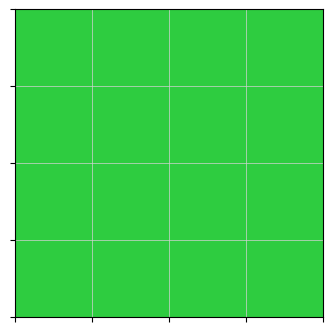

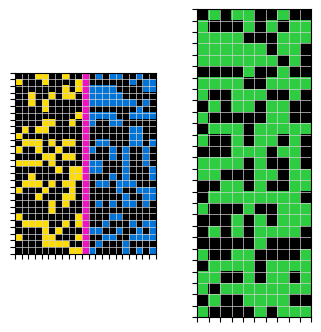

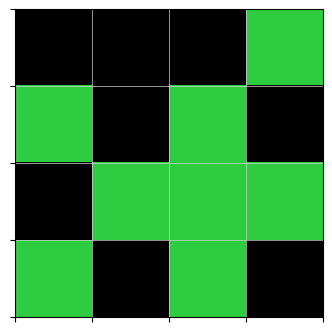

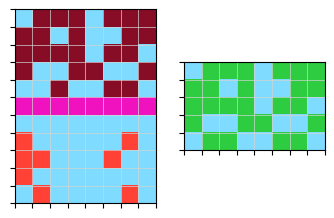

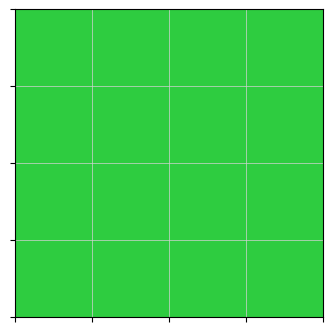







 d13f3404


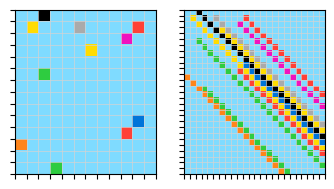

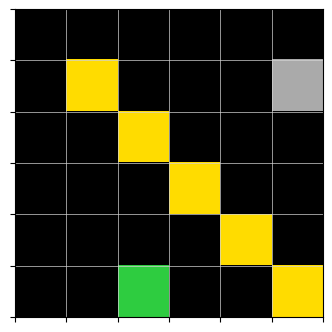

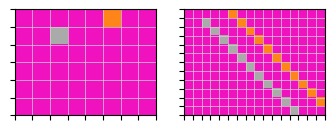

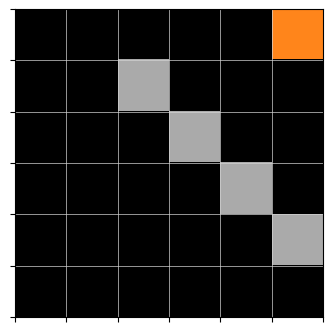

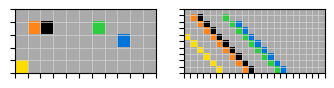

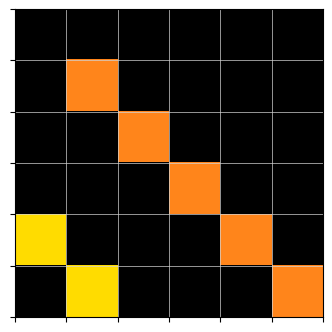

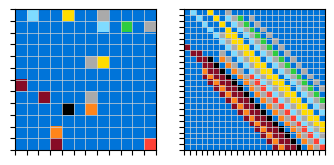

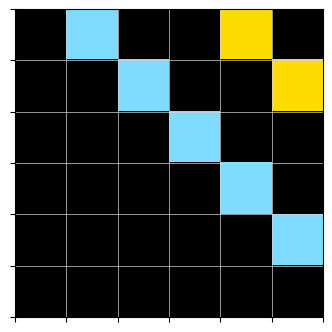

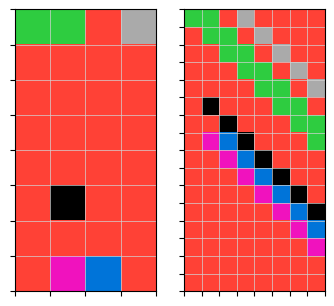

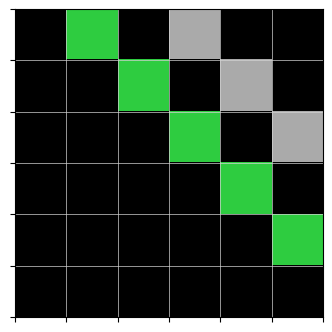

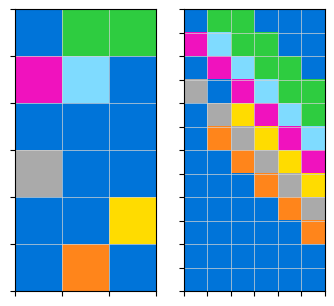

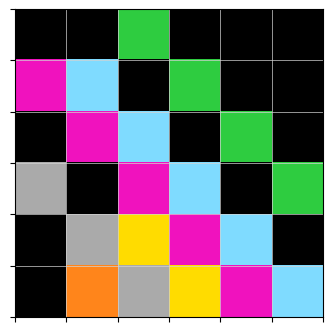

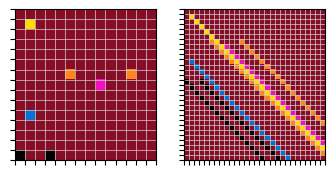

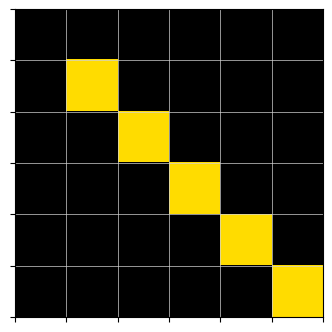

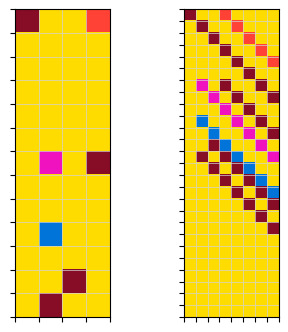

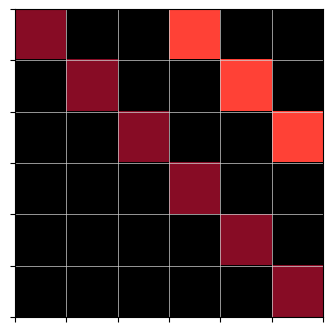

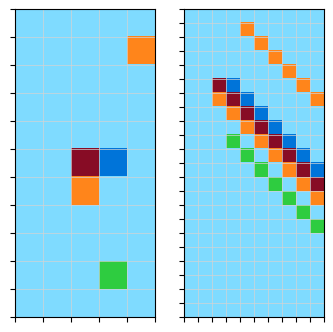

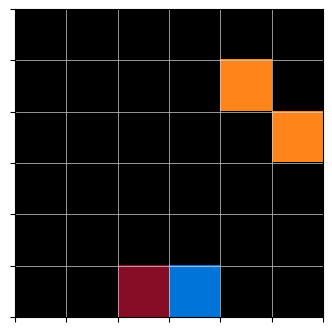

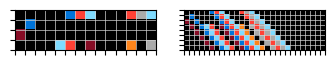

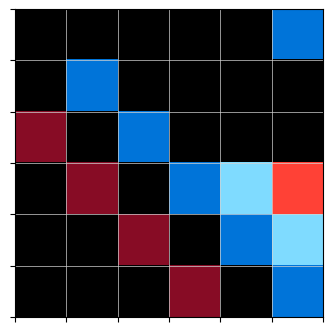







 d4f3cd78


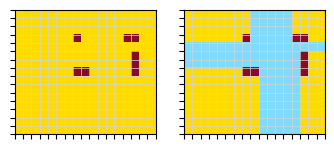

Solver failed.


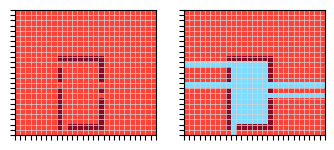

Solver failed.


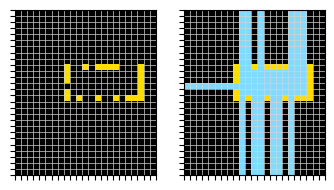

Solver failed.


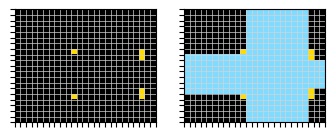

Solver failed.


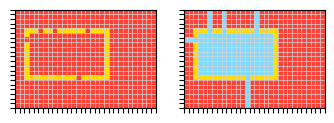

Solver failed.


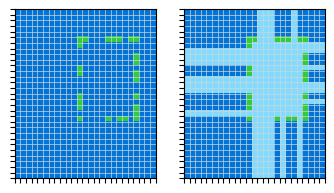

Solver failed.


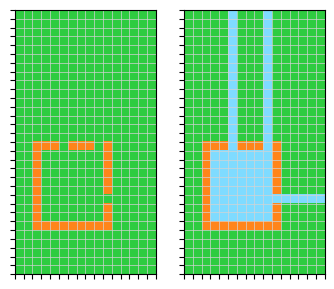

Solver failed.


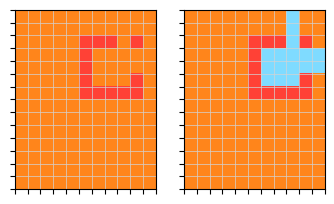

Solver failed.


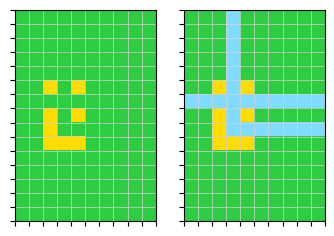

Solver failed.


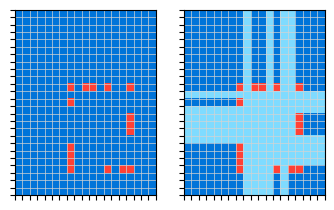

Solver failed.






 d5d6de2d


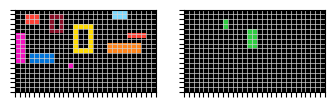

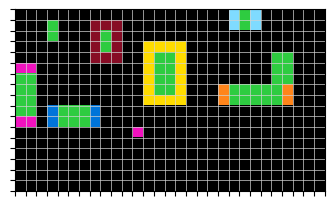

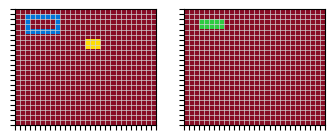

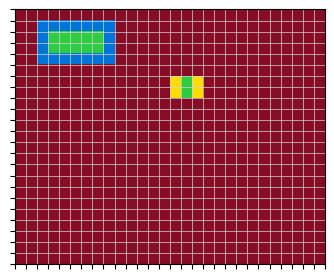

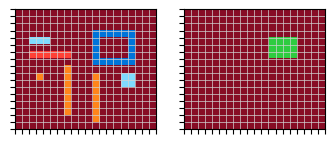

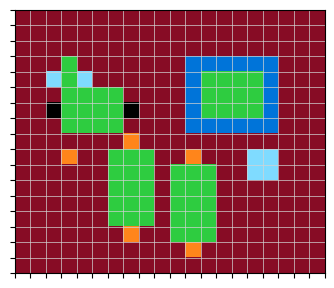

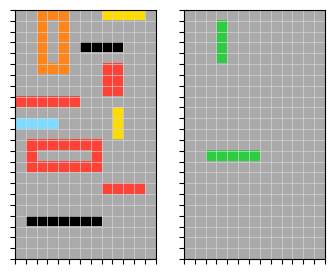

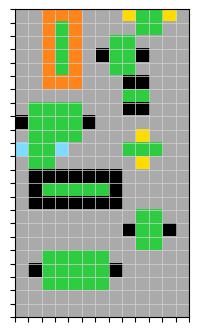

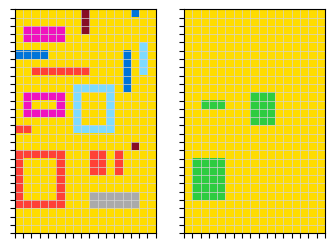

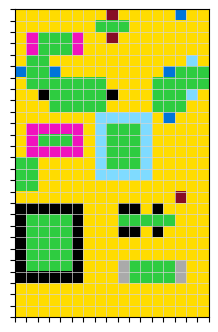

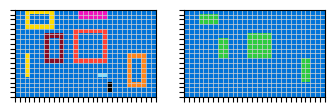

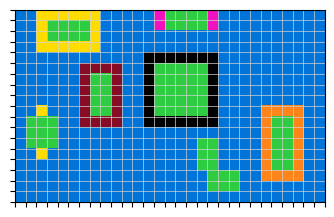

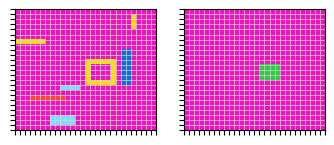

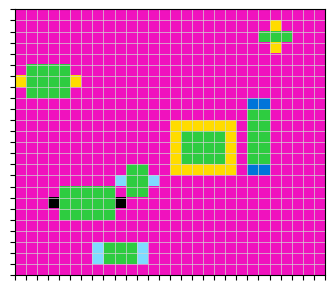

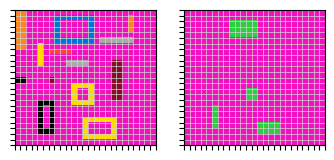

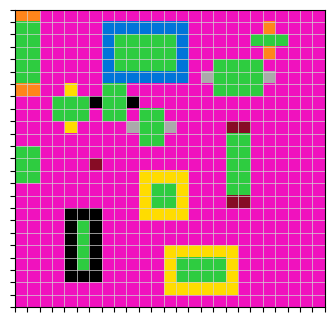

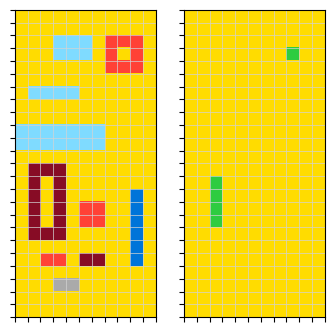

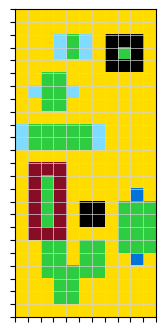

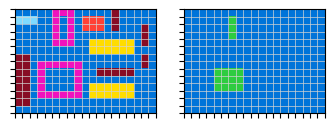

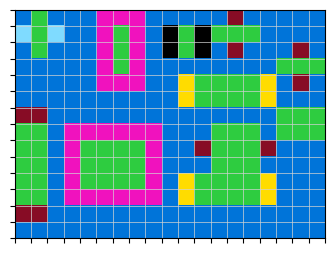







 e179c5f4


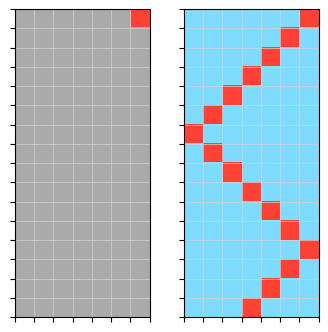

Solver failed.


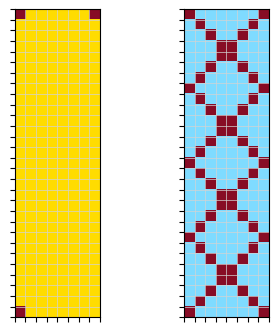

Solver failed.


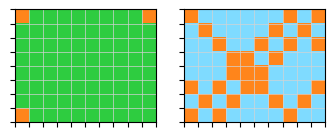

Solver failed.


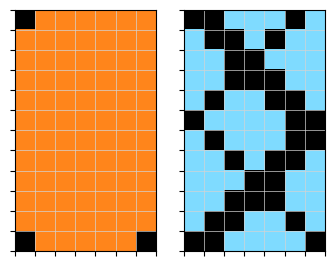

Solver failed.


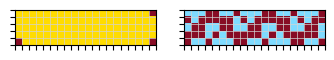

Solver failed.


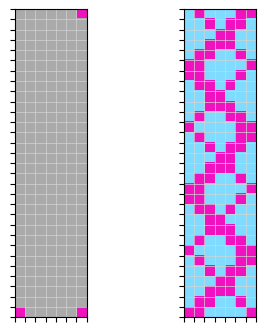

Solver failed.


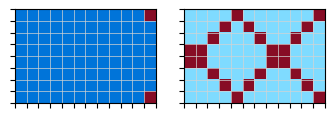

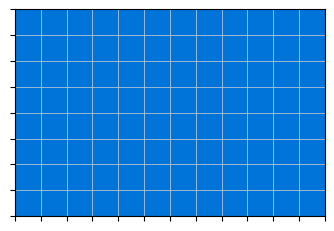

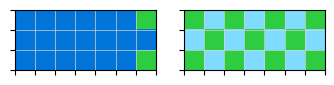

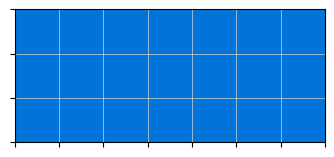

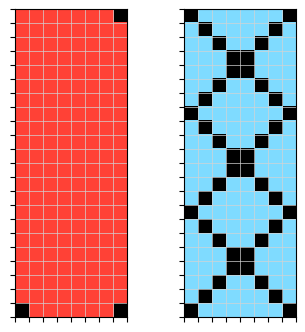

Solver failed.


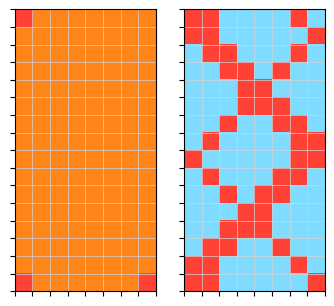

Solver failed.






 ef135b50


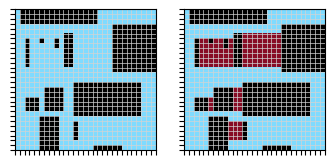

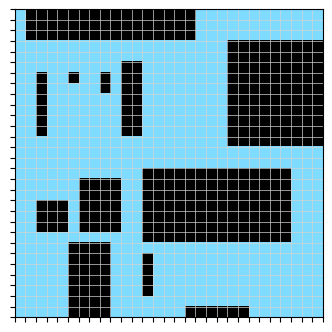

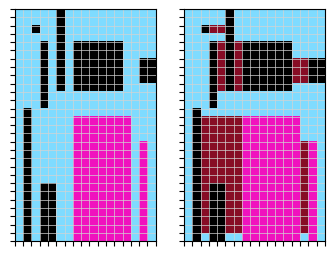

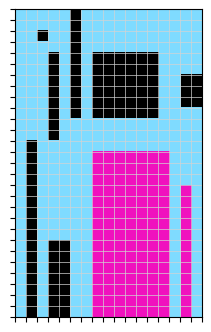

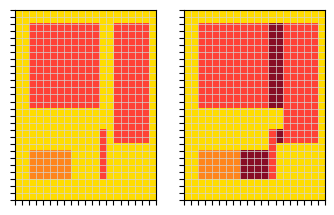

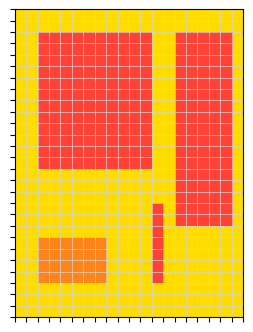

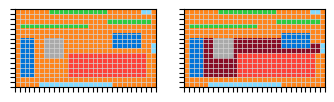

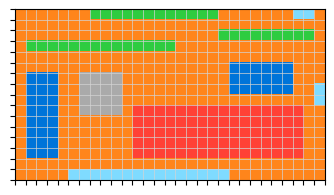

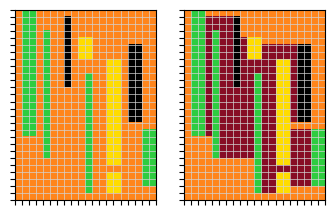

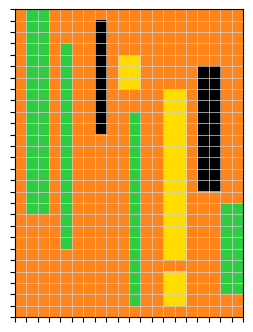

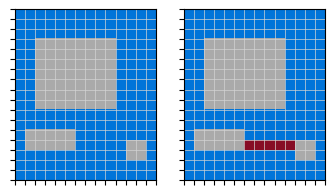

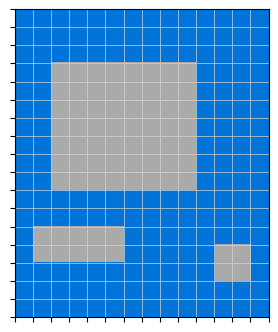

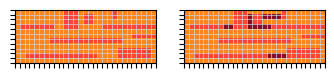

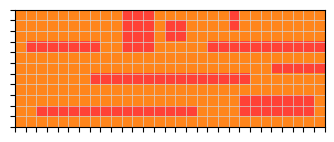

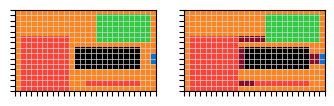

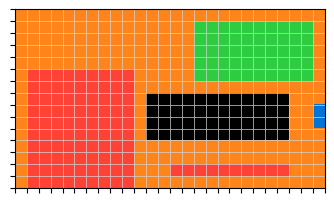

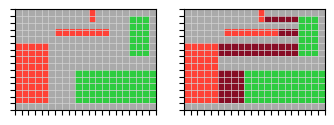

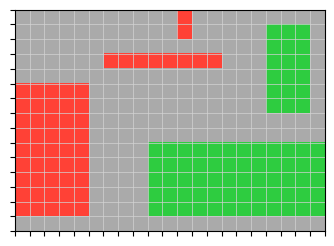

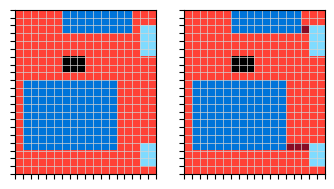

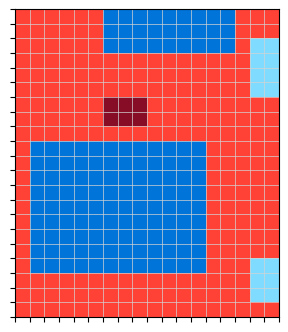







 f25ffba3


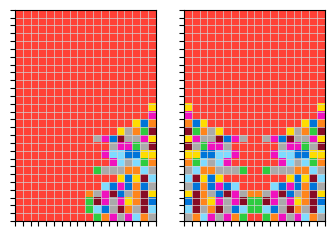

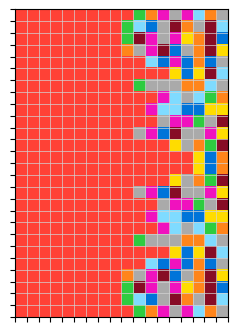

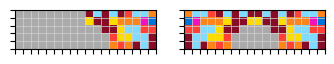

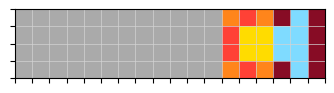

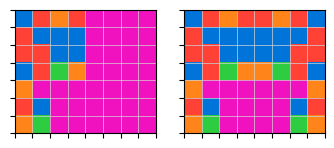

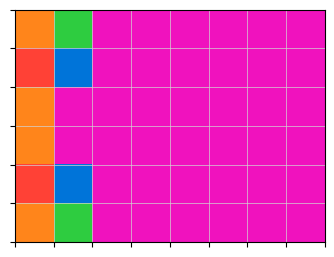

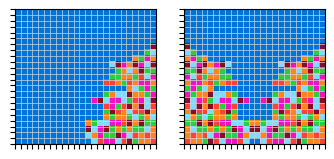

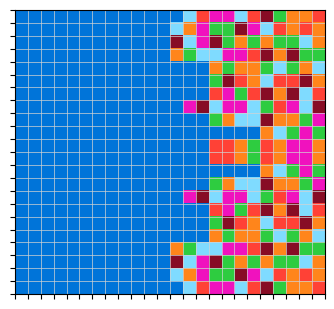

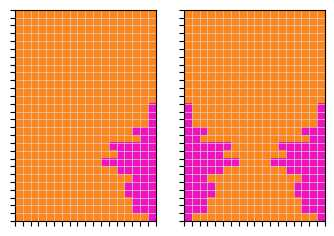

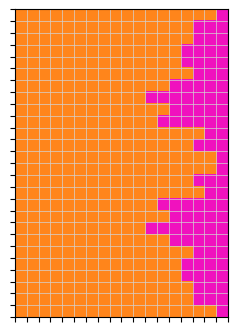

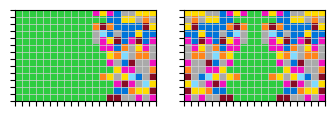

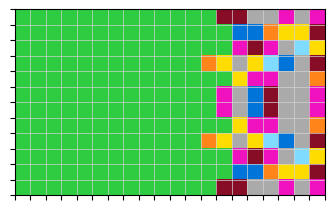

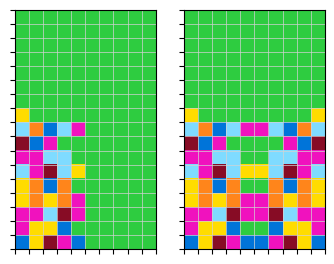

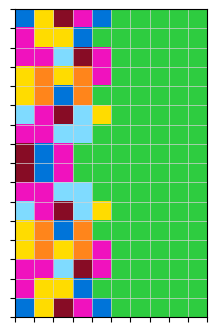

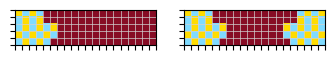

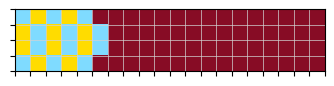

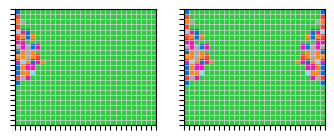

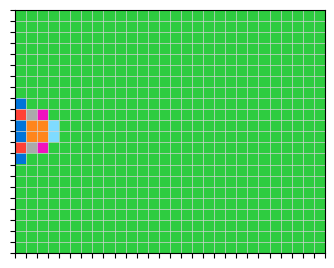

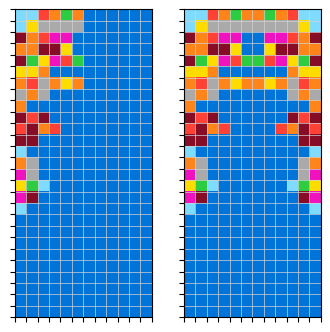

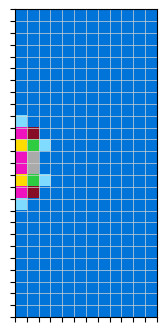







 f8a8fe49


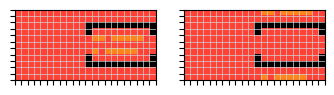

Solver failed.


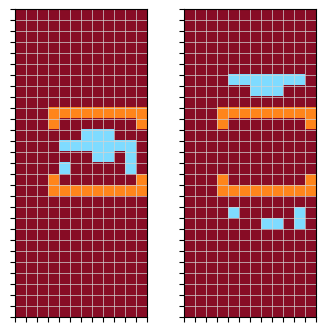

Solver failed.


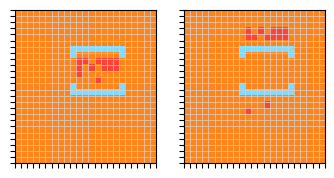

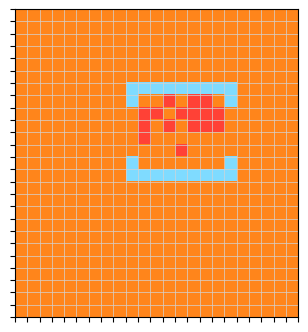

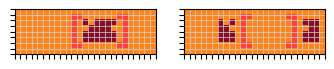

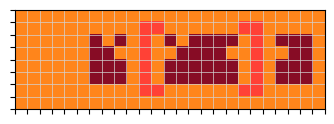

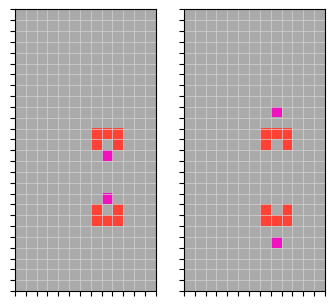

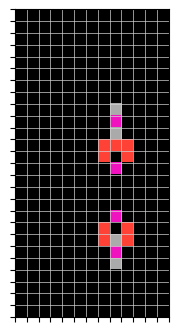

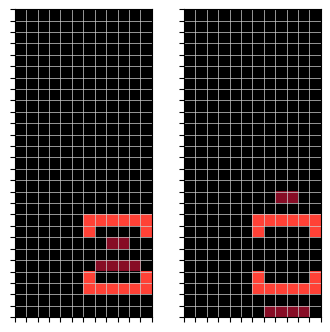

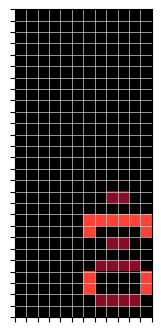

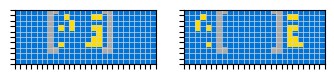

Solver failed.


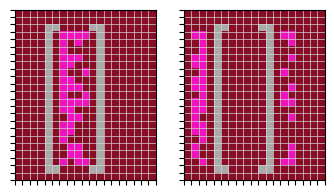

Solver failed.


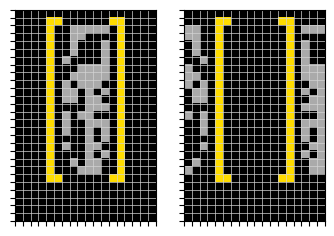

Solver failed.


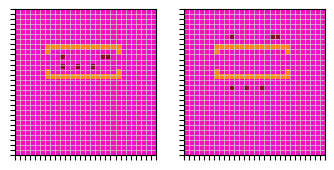

Solver failed.






 ff805c23


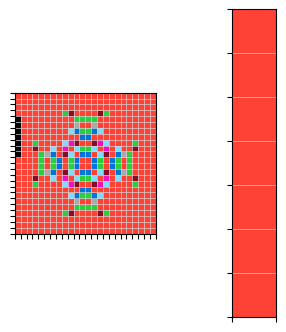

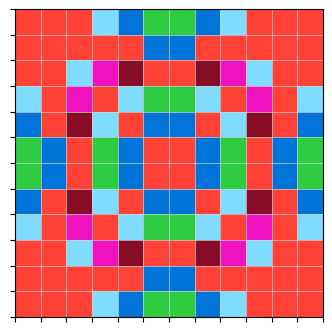

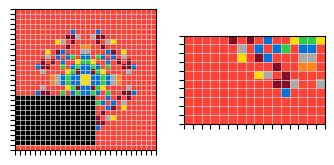

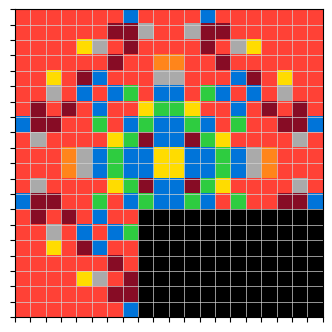

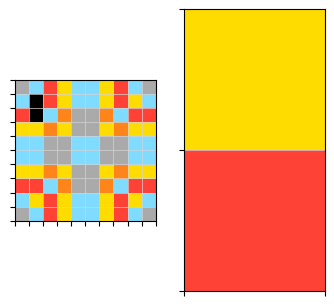

Solver failed.


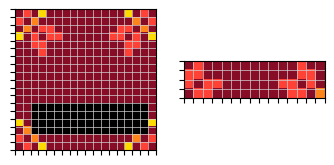

Solver failed.


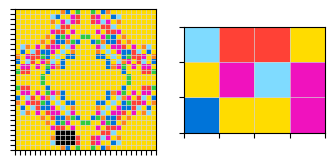

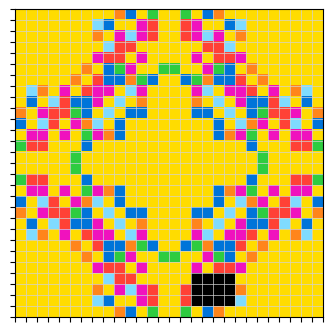

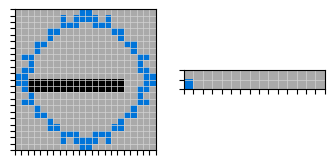

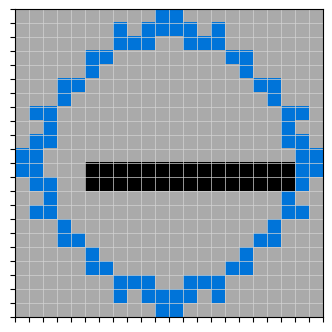

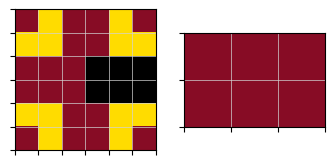

Solver failed.


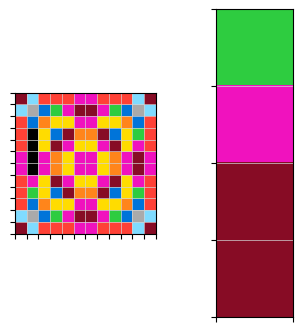

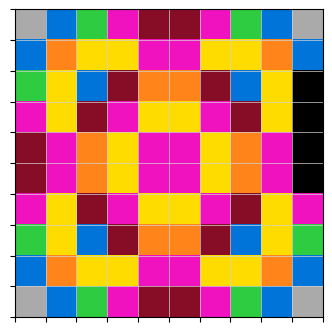

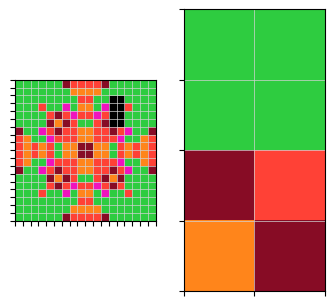

Solver failed.


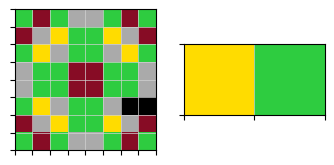

Solver failed.


In [75]:
for label in bad_solver_labels:
    print("\n\n\n\n\n\n", label)
    with open(re_arc_path / f"{label}.json", "r") as f:
        exs = json.load(f)
    F = getattr(task_solvers, f"solve_{label}")
    ast = lambda g: tuple(tuple(r) for r in g) # Converts grid to tuple format for DSL
    for i in range(10):
        show_grids([exs[i]['input'], exs[i]['output']])
        try:
            show_grid(F(ast(exs[i]['input'])))
        except:
            print("Solver failed.")